<h3> Importation des librairies

In [1]:
!pip install pingouin

In [2]:
! pip install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from collections import Counter
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as st
from scipy.stats import t, shapiro, ks_2samp
import pingouin as pg
from pingouin import kruskal, read_dataset
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

<h3> Importation des fichiers csv et transformation en DataFrame

In [4]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%207/data-projet7.csv'
data=pd.read_csv(filepath)

In [5]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%207/gini.csv'
gini=pd.read_csv(filepath,sep=',')

In [6]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%207/9a47c4eb-dc82-40e0-bb96-410aca1df76e_Data.csv'
population=pd.read_csv(filepath)

<h3> Visualisation de la forme du tableau

In [7]:
data.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [8]:
gini.head()

,Series Name,Series Code,Country Name,Country Code,2004 [YR2004],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011]
0,Gini index (World Bank estimate),SI.POV.GINI,Afghanistan,AFG,..,..,..,..,..,..,..
1,Gini index (World Bank estimate),SI.POV.GINI,Albania,ALB,..,..,..,30,..,..,..
2,Gini index (World Bank estimate),SI.POV.GINI,Algeria,DZA,..,..,..,..,..,..,27.6
3,Gini index (World Bank estimate),SI.POV.GINI,American Samoa,ASM,..,..,..,..,..,..,..
4,Gini index (World Bank estimate),SI.POV.GINI,Andorra,AND,..,..,..,..,..,..,..


In [9]:
population.head()

,Series Name,Series Code,Country Name,Country Code,2008 [YR2008]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,27722276
1,"Population, total",SP.POP.TOTL,Albania,ALB,2947314
2,"Population, total",SP.POP.TOTL,Algeria,DZA,34730608
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57492
4,"Population, total",SP.POP.TOTL,Andorra,AND,83862


<h2> <center> Nettoyage des données

<h3> Description des Dataframes

In [10]:
data.describe()

,year_survey,quantile,nb_quantiles
count,11599.000000,11599.000000,11599.0
mean,2007.982757,50.500819,100.0
std,0.909633,28.868424,0.0
min,2004.000000,1.000000,100.0
25%,2008.000000,25.500000,100.0
50%,2008.000000,51.000000,100.0
75%,2008.000000,75.500000,100.0
max,2011.000000,100.000000,100.0


In [11]:
data['country'].unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

<h3> Nombre de pays

In [12]:
data['country'].nunique()

116

<h3> Année des données utilisées

In [13]:
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

<h3> Sélection des colonnes importantes

In [14]:
df_gini=gini[['Country Name','Country Code','2004 [YR2004]','2006 [YR2006]','2007 [YR2007]','2008 [YR2008]','2009 [YR2009]','2010 [YR2010]','2011 [YR2011]']].rename(columns={'Country Name':'country_name','Country Code':'country','2004 [YR2004]':'gini_2004','2006 [YR2006]':'gini_2006','2007 [YR2007]':'gini_2007','2008 [YR2008]':'gini_2008','2009 [YR2009]':'gini_2009','2010 [YR2010]':'gini_2010','2011 [YR2011]':'gini_2011'})
df_gini

,country_name,country,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011
0,Afghanistan,AFG,..,..,..,..,..,..,..
1,Albania,ALB,..,..,..,30,..,..,..
2,Algeria,DZA,..,..,..,..,..,..,27.6
3,American Samoa,ASM,..,..,..,..,..,..,..
4,Andorra,AND,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_gini['country'].nunique()

264

In [16]:
df_population=population[['Country Name','2008 [YR2008]']].rename(columns={'Country Name':'country_name','2008 [YR2008]':'Population_2008'})

In [17]:
df_population

,country_name,Population_2008
0,Afghanistan,27722276
1,Albania,2947314
2,Algeria,34730608
3,American Samoa,57492
4,Andorra,83862
...,...,...
264,NaN,NaN
265,NaN,NaN
266,NaN,NaN
267,NaN,NaN


In [18]:
df_population['country_name'].nunique()

264

<h3> Suppression des valeurs NA et non classified

In [19]:
df_population_mondiales=df_population.dropna()

In [20]:
df_population_mondiales=df_population_mondiales[df_population_mondiales['country_name']!= 'Not classified']

<h3> Transformation des valeurs en numérique

In [21]:
df_population_mondiales['Population_2008']=pd.to_numeric(df_population_mondiales['Population_2008'])

In [22]:
df_population_mondiales

,country_name,Population_2008
0,Afghanistan,27722276
1,Albania,2947314
2,Algeria,34730608
3,American Samoa,57492
4,Andorra,83862
...,...,...
259,Sub-Saharan Africa,822945458
260,Sub-Saharan Africa (excluding high income),821614381
261,Sub-Saharan Africa (IDA & IBRD countries),822945458
262,Upper middle income,2622093293


<h3> Fusion entre la table data et df_gini

In [23]:
data_gini=pd.merge(data,df_gini,how='left',on='country')
data_gini

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011
0,ALB,2008,1,100,"728,89795",7297,Albania,..,..,..,30,..,..,..
1,ALB,2008,2,100,"916,66235",7297,Albania,..,..,..,30,..,..,..
2,ALB,2008,3,100,"1010,916",7297,Albania,..,..,..,30,..,..,..
3,ALB,2008,4,100,"1086,9078",7297,Albania,..,..,..,30,..,..,..
4,ALB,2008,5,100,"1132,6997",7297,Albania,..,..,..,30,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..
11595,COD,2008,97,100,"911,7834","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..
11596,COD,2008,98,100,"1057,8074","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..
11597,COD,2008,99,100,"1286,6029","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..


<h3> Fusion entre la table data_gini et df_population

In [24]:
data_gini_pop=pd.merge(data_gini,df_population_mondiales,how='left',on='country_name')
data_gini_pop

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
0,ALB,2008,1,100,"728,89795",7297,Albania,..,..,..,30,..,..,..,2947314.0
1,ALB,2008,2,100,"916,66235",7297,Albania,..,..,..,30,..,..,..,2947314.0
2,ALB,2008,3,100,"1010,916",7297,Albania,..,..,..,30,..,..,..,2947314.0
3,ALB,2008,4,100,"1086,9078",7297,Albania,..,..,..,30,..,..,..,2947314.0
4,ALB,2008,5,100,"1132,6997",7297,Albania,..,..,..,30,..,..,..,2947314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..,60411195.0
11595,COD,2008,97,100,"911,7834","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..,60411195.0
11596,COD,2008,98,100,"1057,8074","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..,60411195.0
11597,COD,2008,99,100,"1286,6029","303,19305","Congo, Dem. Rep.",42.2,..,..,..,..,..,..,60411195.0


<h3> Visualisation des valeurs NA

In [25]:
data_gini_pop.isna().sum()

country              0
year_survey          0
quantile             0
nb_quantiles         0
income               0
gdpppp             200
country_name       100
gini_2004          100
gini_2006          100
gini_2007          100
gini_2008          100
gini_2009          100
gini_2010          100
gini_2011          100
Population_2008    100
dtype: int64

<h3> Remplacement des valeurs manquantes de gdpppp

In [26]:
data_gini_pop[data_gini_pop['gdpppp'].isnull()==True]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
5800,XKX,2008,1,100,"437,8937",NaN,Kosovo,..,30.3,..,..,31.8,33.3,27.8,1747383.0
5801,XKX,2008,2,100,"508,17133",NaN,Kosovo,..,30.3,..,..,31.8,33.3,27.8,1747383.0
5802,XKX,2008,3,100,"591,8282",NaN,Kosovo,..,30.3,..,..,31.8,33.3,27.8,1747383.0
5803,XKX,2008,4,100,668,NaN,Kosovo,..,30.3,..,..,31.8,33.3,27.8,1747383.0
5804,XKX,2008,5,100,"730,4022",NaN,Kosovo,..,30.3,..,..,31.8,33.3,27.8,1747383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11294,PSE,2009,96,100,"2763,8848",NaN,West Bank and Gaza,34,34,35.6,..,34.5,35.3,34.4,3591977.0
11295,PSE,2009,97,100,"3077,8333",NaN,West Bank and Gaza,34,34,35.6,..,34.5,35.3,34.4,3591977.0
11296,PSE,2009,98,100,"3449,2224",NaN,West Bank and Gaza,34,34,35.6,..,34.5,35.3,34.4,3591977.0
11297,PSE,2009,99,100,"4165,997",NaN,West Bank and Gaza,34,34,35.6,..,34.5,35.3,34.4,3591977.0


C:\Users\Lena\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [27]:
data_gini_pop.loc[data_gini_pop.country=='XKX','gdpppp']='7249.513'
data_gini_pop.loc[data_gini_pop.country=='PSE','gdpppp']='3708.664'

<h3> Remplacement des valeurs de la taiwan car manque d'information sur le coefficient de gini et la population

In [28]:
data_gini_pop[data_gini_pop['Population_2008'].isnull()==True]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
10399,TWN,2008,1,100,"3477,18",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10400,TWN,2008,2,100,"4740,2637",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10401,TWN,2008,3,100,"5331,3013",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10402,TWN,2008,4,100,"5761,6577",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10403,TWN,2008,5,100,"6093,2017",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,TWN,2008,96,100,"38123,46",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10495,TWN,2008,97,100,"41663,79",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10496,TWN,2008,98,100,"46650,582",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10497,TWN,2008,99,100,"54016,992",25342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_gini_pop.loc[data_gini_pop.country=='TWN','country_name']='Taiwan'
data_gini_pop.loc[data_gini_pop.country=='TWN','gini_2009']='34.5'
data_gini_pop.loc[data_gini_pop.country=='TWN','Population_2008']=17530000

<h3> Visualisation des NA

In [30]:
data_gini_pop.isna().sum()

country              0
year_survey          0
quantile             0
nb_quantiles         0
income               0
gdpppp               0
country_name         0
gini_2004          100
gini_2006          100
gini_2007          100
gini_2008          100
gini_2009            0
gini_2010          100
gini_2011          100
Population_2008      0
dtype: int64

<h3> Vérification du types des variables

In [31]:
data_gini_pop.dtypes

country             object
year_survey          int64
quantile             int64
nb_quantiles         int64
income              object
gdpppp              object
country_name        object
gini_2004           object
gini_2006           object
gini_2007           object
gini_2008           object
gini_2009           object
gini_2010           object
gini_2011           object
Population_2008    float64
dtype: object

<h3> Transformation des variables en numérique

In [32]:
data_gini_pop['income']=data_gini_pop['income'].str.replace(',', '.').astype(float)
data_gini_pop['gdpppp']=data_gini_pop['gdpppp'].str.replace(',', '.').astype(float)

C:\Users\Lena\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [33]:
data_gini_pop['gini_2004'] = data_gini_pop['gini_2004'].replace('..',np.nan)
data_gini_pop['gini_2006'] = data_gini_pop['gini_2006'].replace('..',np.nan)
data_gini_pop['gini_2007'] = data_gini_pop['gini_2007'].replace('..',np.nan)
data_gini_pop['gini_2008'] = data_gini_pop['gini_2008'].replace('..',np.nan)
data_gini_pop['gini_2009'] = data_gini_pop['gini_2009'].replace('..',np.nan)
data_gini_pop['gini_2010'] = data_gini_pop['gini_2010'].replace('..',np.nan)
data_gini_pop['gini_2011'] = data_gini_pop['gini_2011'].replace('..',np.nan)

In [34]:
data_gini_pop['gini_2004']=pd.to_numeric(data_gini_pop['gini_2004'])
data_gini_pop['gini_2006']=pd.to_numeric(data_gini_pop['gini_2006'])
data_gini_pop['gini_2007']=pd.to_numeric(data_gini_pop['gini_2007'])
data_gini_pop['gini_2008']=pd.to_numeric(data_gini_pop['gini_2008'])
data_gini_pop['gini_2009']=pd.to_numeric(data_gini_pop['gini_2009'])
data_gini_pop['gini_2010']=pd.to_numeric(data_gini_pop['gini_2010'])
data_gini_pop['gini_2011']=pd.to_numeric(data_gini_pop['gini_2011'])

In [35]:
data_gini_pop.dtypes

country             object
year_survey          int64
quantile             int64
nb_quantiles         int64
income             float64
gdpppp             float64
country_name        object
gini_2004          float64
gini_2006          float64
gini_2007          float64
gini_2008          float64
gini_2009          float64
gini_2010          float64
gini_2011          float64
Population_2008    float64
dtype: object

In [36]:
data_gini_pop.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
count,11599.000000,11599.000000,11599.0,11599.000000,1.159900e+04,6499.000000,6799.000000,6699.000000,6799.000000,7099.000000,7099.000000,6599.000000,1.159900e+04
mean,2007.982757,50.500819,100.0,6069.224260,4.944979e+04,37.490845,37.725489,36.498761,37.557626,36.846429,36.058093,35.900515,5.343860e+07
std,0.909633,28.868424,0.0,9414.185972,3.966471e+05,8.948376,8.926868,8.040619,9.122319,8.056170,8.022468,7.876957,1.677623e+08
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02,24.800000,24.400000,24.400000,23.700000,24.800000,24.800000,24.600000,3.174140e+05
25%,2008.000000,25.500000,100.0,900.685515,2.577000e+03,30.500000,30.200000,31.100000,31.000000,30.800000,30.200000,29.400000,4.768212e+06
50%,2008.000000,51.000000,100.0,2403.244900,7.505000e+03,34.400000,35.400000,34.800000,34.700000,34.900000,33.700000,34.300000,1.388383e+07
75%,2008.000000,75.500000,100.0,7515.420900,1.838850e+04,42.200000,44.800000,40.300000,45.000000,43.700000,40.200000,40.900000,3.993607e+07
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06,58.100000,57.500000,55.800000,63.000000,54.300000,63.400000,56.200000,1.324655e+09


<h3> Recherche de valeurs anormales

In [37]:
largest_gdpppp=data_gini_pop.nlargest(200,'gdpppp')
largest_gdpppp

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
3200,FJI,2008,1,100,308.17334,4300332.0,Fiji,NaN,NaN,NaN,40.4,NaN,NaN,NaN,845361.0
3201,FJI,2008,2,100,384.33230,4300332.0,Fiji,NaN,NaN,NaN,40.4,NaN,NaN,NaN,845361.0
3202,FJI,2008,3,100,436.59265,4300332.0,Fiji,NaN,NaN,NaN,40.4,NaN,NaN,NaN,845361.0
3203,FJI,2008,4,100,486.81436,4300332.0,Fiji,NaN,NaN,NaN,40.4,NaN,NaN,NaN,845361.0
3204,FJI,2008,5,100,520.19720,4300332.0,Fiji,NaN,NaN,NaN,40.4,NaN,NaN,NaN,845361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,LUX,2008,96,100,53724.63000,73127.0,Luxembourg,30.2,30.9,31.1,32.6,31.2,30.5,32.1,488650.0
6395,LUX,2008,97,100,58382.31200,73127.0,Luxembourg,30.2,30.9,31.1,32.6,31.2,30.5,32.1,488650.0
6396,LUX,2008,98,100,65280.22000,73127.0,Luxembourg,30.2,30.9,31.1,32.6,31.2,30.5,32.1,488650.0
6397,LUX,2008,99,100,77673.37000,73127.0,Luxembourg,30.2,30.9,31.1,32.6,31.2,30.5,32.1,488650.0


Données de FJI trop élevé par rapport au autre valeur (10^2)

<h3> Remplacement de la données gdpppp de FJI

In [38]:
data_gini_pop.loc[data_gini_pop.country=='FJI','gdpppp']=7777.693

In [39]:
data_gini_pop

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
0,ALB,2008,1,100,728.89795,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0


<h3> Recherche du centile manquant

In [40]:
data_gini_pop_groupby = data_gini_pop.groupby(['country','year_survey','country_name','Population_2008']).agg({'quantile' : 'sum','income': 'mean','gdpppp' : 'mean','nb_quantiles':'count','gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'})
data_gini_pop_groupby

,,,,quantile,income,gdpppp,nb_quantiles,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011
country,year_survey,country_name,Population_2008,,,,,,,,,,,
ALB,2008,Albania,2947314.0,5050,2994.829902,7297.000,100,NaN,NaN,NaN,30.0,NaN,NaN,NaN
ARG,2008,Argentina,40080160.0,5050,5847.884654,13220.000,100,48.4,46.3,46.2,44.9,43.7,43.6,42.6
ARM,2008,Armenia,2907618.0,5050,1628.382785,5611.000,100,37.5,29.7,31.2,29.2,28.0,30.0,29.4
AUT,2008,Austria,8321496.0,5050,16637.600204,36193.000,100,29.8,29.6,30.6,30.4,31.5,30.3,30.8
AZE,2008,Azerbaijan,8763400.0,5050,2357.429023,8101.000,100,26.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,2006,"Venezuela, RB",27635832.0,5050,3167.147724,11756.000,100,47.5,44.8,NaN,NaN,NaN,NaN,NaN
VNM,2006,Vietnam,86243413.0,5050,1377.773966,2578.000,100,36.8,35.8,NaN,35.6,NaN,39.3,NaN
XKX,2008,Kosovo,1747383.0,5050,2176.269035,7249.513,100,NaN,30.3,NaN,NaN,31.8,33.3,27.8


In [41]:
data_gini_pop_groupby.loc[(data_gini_pop_groupby['nb_quantiles'] <100)]

,,,,quantile,income,gdpppp,nb_quantiles,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011
country,year_survey,country_name,Population_2008,,,,,,,,,,,
LTU,2008,Lithuania,3198231.0,5009,6641.247634,17571.0,99,37.0,34.4,34.8,35.7,37.2,33.6,32.5


Manque d'un quantile de la lithuania

In [42]:
revenu_lituanie= data_gini_pop.loc[(data_gini_pop['country'] == 'LTU')]

revenu_lituanie

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
6200,LTU,2008,1,100,566.3453,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6201,LTU,2008,2,100,1147.0587,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6202,LTU,2008,3,100,1490.8408,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6203,LTU,2008,4,100,1746.5715,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6204,LTU,2008,5,100,1842.9542,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,LTU,2008,96,100,14597.0360,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6295,LTU,2008,97,100,15659.0080,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6296,LTU,2008,98,100,17883.8770,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6297,LTU,2008,99,100,22551.1700,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0


In [43]:
revenu_lituanie['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

Numéro 41 manquant

<h3> Détermination du quantile avec les moyennes du quantile avant et après

In [44]:
quantile_40_LTU =revenu_lituanie.loc[(revenu_lituanie['quantile'] == 40)]
quantile_40_LTU

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
6239,LTU,2008,40,100,4868.4507,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0


In [45]:
quantile_42_LTU =revenu_lituanie.loc[(revenu_lituanie['quantile'] == 42)]
quantile_42_LTU

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
6240,LTU,2008,42,100,4895.8306,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0


In [46]:
quantile_41_LTU = (int(quantile_40_LTU['income']) + int(quantile_42_LTU['income'])) / 2
quantile_41_LTU

4881.5

<h3> Ajout du quantile dans la Dataframe

In [47]:
LTU_row_41=pd.Series(data={'country':'LTU', 'year_survey':2008,'quantile': 41, 'nb_quantiles':100,'income':4868.4507,'gdpppp':17571.0,'country_name':'Lithuania','gini_2004':37.0,'gini_2006':34.4,'gini_2007':34.8,'gini_2008':35.7,'gini_2009':37.2,'gini_2010':33.6,'gini_2011':32.5,'Population_2008':3.19823e+06},name=6240)
data_gini_pop=data_gini_pop.append(LTU_row_41,ignore_index=False)
data_gini_pop.tail()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
11595,COD,2008,97,100,911.7834,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11596,COD,2008,98,100,1057.8074,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11597,COD,2008,99,100,1286.6029,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11598,COD,2008,100,100,2243.1226,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
6240,LTU,2008,41,100,4868.4507,17571.00000,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198230.0


In [48]:
data_gini_pop=data_gini_pop.sort_index()

In [49]:
data_gini_pop=data_gini_pop.reset_index(drop=True)

<h3> Vérification de la position du quantile

In [50]:
revenu_lituanie2= data_gini_pop.loc[(data_gini_pop['country'] == 'LTU')&(data_gini_pop['quantile']>39) & (data_gini_pop['quantile']<50)]
revenu_lituanie2

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
6239,LTU,2008,40,100,4868.4507,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6240,LTU,2008,41,100,4868.4507,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198230.0
6241,LTU,2008,42,100,4895.8306,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6242,LTU,2008,43,100,4950.6380,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6243,LTU,2008,44,100,5006.7860,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6244,LTU,2008,45,100,5028.5444,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6245,LTU,2008,46,100,5088.5090,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6246,LTU,2008,47,100,5165.5580,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6247,LTU,2008,48,100,5239.3403,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0
6248,LTU,2008,49,100,5327.5730,17571.0,Lithuania,37.0,34.4,34.8,35.7,37.2,33.6,32.5,3198231.0


<h2> <center> Mission 1

**Année des données**

In [51]:
data['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

Pour cette étude 7 différentes années on été sélectionnées. 

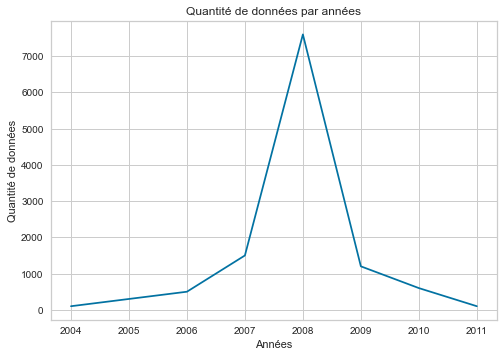

In [52]:
year=data.year_survey.groupby(data.year_survey).count()
data.year_survey.unique(),data.year_survey.groupby(data.year_survey).count().plot()
plt.xlabel('Années')
plt.ylabel('Quantité de données')
plt.title('Quantité de données par années')
plt.show()

Il y a le plus de données pour l'année 2008

In [53]:
year

year_survey
2004     100
2006     500
2007    1500
2008    7599
2009    1200
2010     600
2011     100
Name: year_survey, dtype: int64

**Nombre de pays présents**

In [54]:
data['country'].nunique()

116

Dans cette étude il y a 116 pays présents.

**Population couverte par l'analyse**

In [55]:
pop_totale=df_population_mondiales.loc[(df_population_mondiales['country_name']=='World')]
pop_totale

,country_name,Population_2008
263,World,6757020830


In [56]:
pop_total=6757020830

In [57]:
pop_etude=data_gini_pop['Population_2008'].sum()
pop_etude

619837532099.0

In [58]:
pourcentage=pop_etude/pop_total
print("Le pourcentage de la population couverte par l'analyse est de " + str(pourcentage)+'%')

Le pourcentage de la population couverte par l'analyse est de 91.73236958912852%


**Type de quantiles**

il s'agit de centiles.

**Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ?**

Oui, cela permet de regrouper la population en fonction de différents critère ici un quantile représente une classe de revenu.

**La parité de pouvoir d'achat (PPA)** (valeurs mesurées en parité de pouvoir d'achat) est une méthode utilisée en économie pour établir une comparaison, entre pays, du pouvoir d'achat des devises nationales. Le pouvoir d'achat d’une quantité donnée d’argent dépend en effet du coût de la vie, c’est-à-dire du niveau général des prix. Le PPA permet de mesurer combien une devise permet d’acheter de biens et services dans chacune des zones que l’on compare.

<h2> <center> Mission 2 

<h3> Diversité de pays en termes de distribution de revenus

In [59]:
data_gini_pop

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008
0,ALB,2008,1,100,728.89795,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,96,100,810.62330,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11596,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11597,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0
11598,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0


**Sélection de 6 pays**

In [60]:
data_gini_pop['country_name'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan',
       'Belgium', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bosnia and Herzegovina', 'Belarus', 'Bolivia', 'Brazil', 'Bhutan',
       'Central African Republic', 'Canada', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Colombia', 'Costa Rica', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Finland',
       'Fiji', 'France', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iran, Islamic Rep.', 'Iraq',
       'Iceland', 'Israel', 'Italy', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Korea, Rep.', 'Kosovo',
       'Lao PDR', 'Liberia', 'Sri Lanka', 'Lithuania', 'Luxembourg',
       'Latvia', 'Morocco', 'Moldova', 'Madagascar', 'Mexico',
       'North Macedonia', 'Mali', 'Montenegr

**Sélection des pays de manière individuel**

In [61]:
france=data_gini_pop.loc[(data_gini_pop["country_name"]=='France')]
iceland=data_gini_pop.loc[(data_gini_pop["country_name"]=='Iceland')]
ecuador=data_gini_pop.loc[(data_gini_pop["country_name"]=='Ecuador')]
usa=data_gini_pop.loc[(data_gini_pop["country_name"]=='United States')]
brazil=data_gini_pop.loc[(data_gini_pop["country_name"]=='Brazil')]
russian=data_gini_pop.loc[(data_gini_pop["country_name"]=='Russian Federation')]

**Sélection des colonnes importantes**

In [62]:
france_income=france[['quantile','income']]
iceland_income=iceland[['quantile','income']]
ecuador_income=ecuador[['quantile','income']]
usa_income=usa[['quantile','income']]
brazil_income=brazil[['quantile','income']]
russian_income=russian[['quantile','income']]

france_income_index=france_income.set_index('quantile')
iceland_income_index=iceland_income.set_index('quantile')
ecuador_income_index=ecuador_income.set_index('quantile')
usa_income_index=usa_income.set_index('quantile')
brazil_income_index=brazil_income.set_index('quantile')
russian_income_index=russian_income.set_index('quantile')

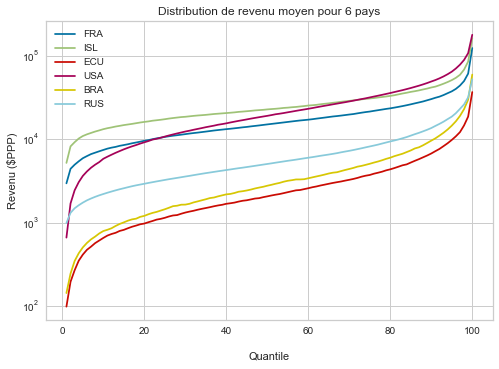

In [63]:
plt.plot(france_income_index,label='FRA')
plt.plot(iceland_income_index,label='ISL')
plt.plot(ecuador_income_index,label='ECU')
plt.plot(usa_income_index,label='USA')
plt.plot(brazil_income_index,label='BRA')
plt.plot(russian_income_index,label='RUS')
plt.title("Distribution de revenu moyen pour 6 pays")
plt.yscale('log')
plt.xlabel('\nQuantile')
plt.ylabel('Revenu ($PPP)')
plt.legend()
plt.show()

On observe une diversité pour la distribution de revenu moyen pour les 6 pays sélectionnées

<h3> Représentation de la courbe de Lorenz pour chaque pays choisis

**France**

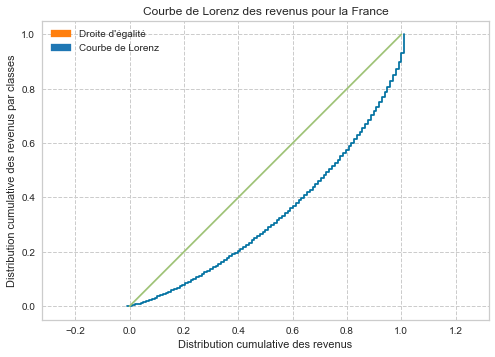

In [64]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dep = france['income']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz des revenus pour la France")
plt.xlabel('Distribution cumulative des revenus')
plt.ylabel("Distribution cumulative des revenus par classes")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

**Iceland**

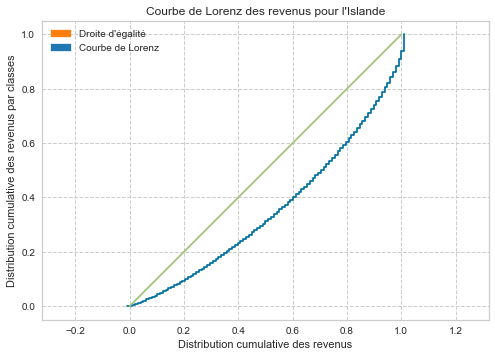

In [65]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dep = iceland['income']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz des revenus pour l'Islande")
plt.xlabel('Distribution cumulative des revenus')
plt.ylabel("Distribution cumulative des revenus par classes")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

**Ecuador**

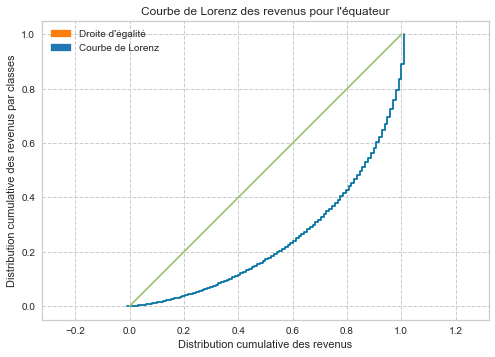

In [66]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dep = ecuador['income']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz des revenus pour l'équateur")
plt.xlabel('Distribution cumulative des revenus')
plt.ylabel("Distribution cumulative des revenus par classes")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

**United States**

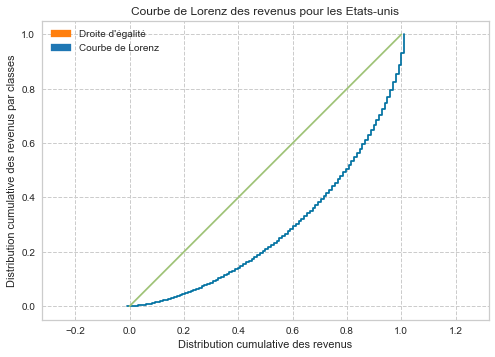

In [67]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dep = usa['income']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz des revenus pour les Etats-unis")
plt.xlabel('Distribution cumulative des revenus')
plt.ylabel("Distribution cumulative des revenus par classes")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

**Brazil**

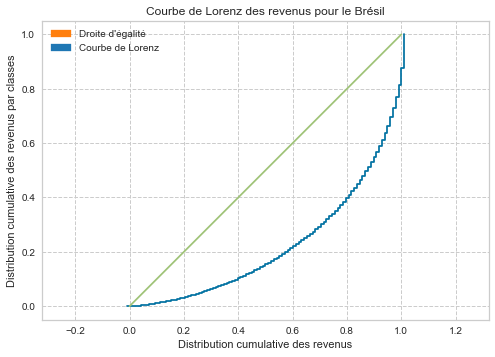

In [68]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dep = brazil['income']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz des revenus pour le Brésil")
plt.xlabel('Distribution cumulative des revenus')
plt.ylabel("Distribution cumulative des revenus par classes")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

**Russian federation**

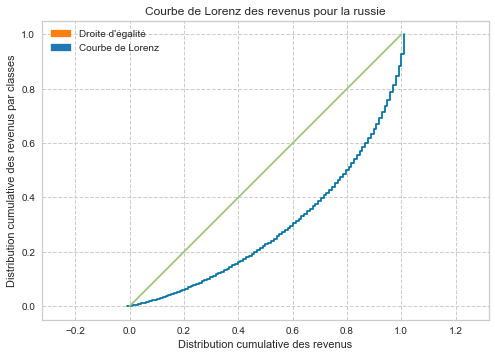

In [69]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
dep = russian['income']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1],[0,1])
plt.grid(True,which='both',linestyle='--')
plt.title("Courbe de Lorenz des revenus pour la russie")
plt.xlabel('Distribution cumulative des revenus')
plt.ylabel("Distribution cumulative des revenus par classes")
orange_patch = mpatches.Patch(color='tab:orange', label="Droite d'égalité")
blue_patch = mpatches.Patch(color='tab:blue', label="Courbe de Lorenz")
plt.legend(handles=[orange_patch,blue_patch])
plt.show()

**Courbe de lorenz avec chaque pays sélectionnés**

In [70]:
graph_lorenz=data_gini_pop.loc[(data_gini_pop["country_name"]=='France')|(data_gini_pop["country_name"]=='United States')|(data_gini_pop["country_name"]=='Iceland')|(data_gini_pop["country_name"]=='Ecuador')|(data_gini_pop["country_name"]=='Brazil')|(data_gini_pop["country_name"]=='Russian Federation')]
graph_lorenz_index=graph_lorenz.set_index('country_name')
graph_lorenz_pays=graph_lorenz_index[['country','income']]

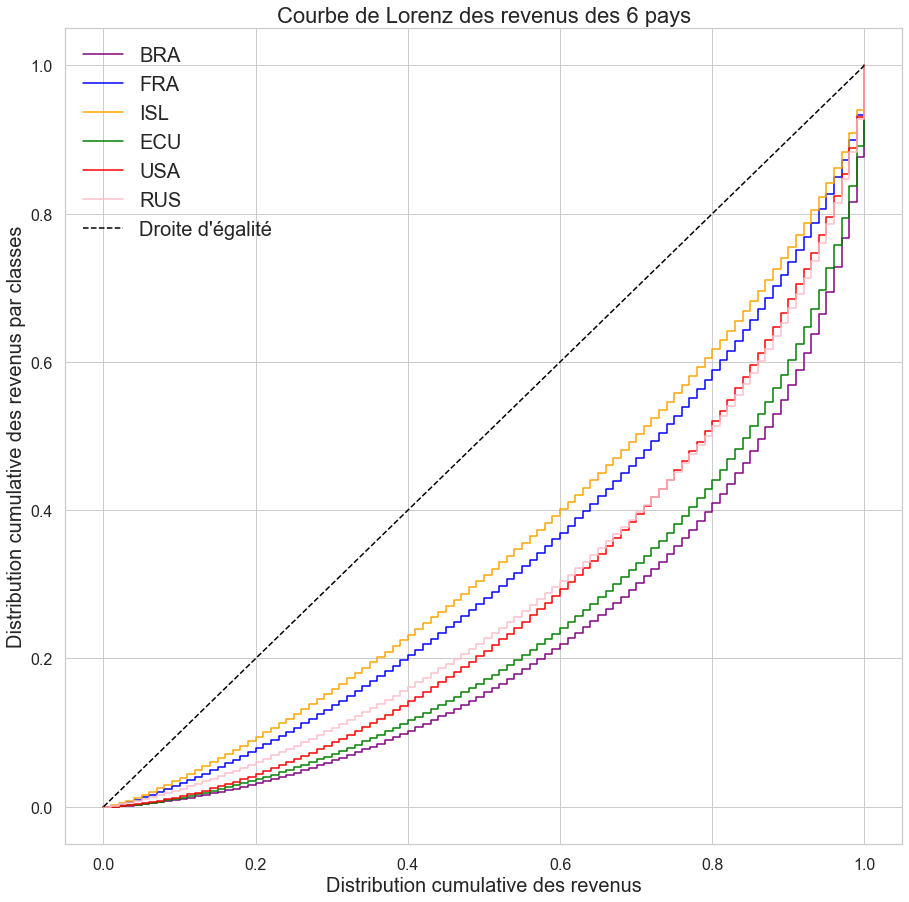

In [72]:
sns.set(style="whitegrid")
couleur=['purple','blue','orange','green','red','pink']
liste_pays=['BRA','FRA','ISL','ECU','USA','RUS']
plt.figure(figsize=(15,15))
for i in range(len(liste_pays)):
    temporaire=graph_lorenz_pays.loc[(graph_lorenz_pays['country']==liste_pays[i]),:]
    depenses = temporaire[temporaire['income'] > 0]
    dep = temporaire['income'].values
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',
         label=liste_pays[i],color=couleur[i])
plt.plot([0,1],[0,1],color='black', linestyle='--', label="Droite d'égalité")
plt.title("Courbe de Lorenz des revenus des 6 pays",fontsize=22)
plt.xlabel('Distribution cumulative des revenus',fontsize=20)
plt.ylabel("Distribution cumulative des revenus par classes",fontsize=20)
plt.legend(prop={'size':20})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

On remarque que l'inégalité n'est pas la même pour chaque pays, elle est la plus grande pour le brésil.

<h3> Evolution de l'indice de Gini au fil des ans

**France**

In [73]:
france_groupby = france.groupby(['country']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
france_groupby_index=france_groupby.reset_index(drop=True)
france_groupby_index

,2004,2006,2007,2008,2009,2010,2011
0,30.6,29.7,32.4,33.0,32.7,33.7,33.3


In [74]:
france_groupby_stacked=france_groupby.stack().reset_index(level=0,drop=True)
france_groupby_stacked

2004    30.6
2006    29.7
2007    32.4
2008    33.0
2009    32.7
2010    33.7
2011    33.3
dtype: float64

**Iceland**

In [75]:
iceland_groupby = iceland.groupby(['country']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
iceland_groupby_index=iceland_groupby.reset_index(drop=True)
iceland_groupby_index
iceland_groupby_stacked=iceland_groupby.stack().reset_index(level=0,drop=True)
iceland_groupby_stacked

2004    28.0
2006    30.2
2007    29.5
2008    31.8
2009    28.7
2010    26.2
2011    26.8
dtype: float64

**Ecuador**

In [76]:
ecuador_groupby = ecuador.groupby(['country']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
ecuador_groupby_index=ecuador_groupby.reset_index(drop=True)
ecuador_groupby_index
ecuador_groupby_stacked=ecuador_groupby.stack().reset_index(level=0,drop=True)
ecuador_groupby_stacked

2004    53.9
2006    52.3
2007    53.4
2008    49.8
2009    48.5
2010    48.8
2011    45.9
dtype: float64

**Etats-unis**

In [77]:
usa_groupby = usa.groupby(['country']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
usa_groupby_index=usa_groupby.reset_index(drop=True)
usa_groupby_index
usa_groupby_stacked=usa_groupby.stack().reset_index(level=0,drop=True)
usa_groupby_stacked

2004    40.3
2006    41.4
2007    40.8
2008    40.8
2009    40.6
2010    40.0
2011    40.9
dtype: float64

**Brésil**

In [78]:
brazil_groupby = brazil.groupby(['country']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
brazil_groupby_index=brazil_groupby.reset_index(drop=True)
brazil_groupby_index
brazil_groupby_stacked=brazil_groupby.stack().reset_index(level=0,drop=True)
brazil_groupby_stacked

2004    56.5
2006    55.6
2007    54.9
2008    54.0
2009    53.7
2011    52.9
dtype: float64

In [79]:
russian_groupby = russian.groupby(['country']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
russian_groupby_index=russian_groupby.reset_index(drop=True)
russian_groupby_index
russian_groupby_stacked=russian_groupby.stack().reset_index(level=0,drop=True)
russian_groupby_stacked

2004    40.3
2006    41.0
2007    42.3
2008    41.6
2009    39.8
2010    39.5
2011    39.7
dtype: float64

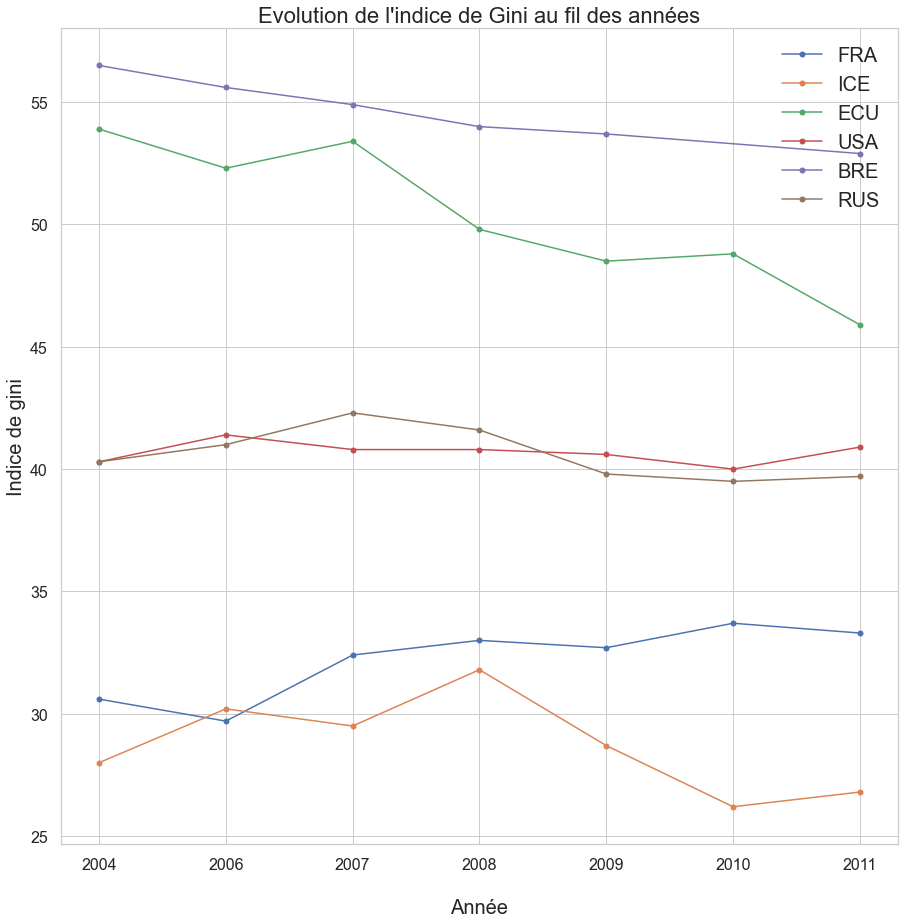

In [82]:
plt.figure(figsize=(15,15))
plt.plot(france_groupby_stacked,label='FRA',marker = 'o')
plt.plot(iceland_groupby_stacked,label='ICE',marker = 'o')
plt.plot(ecuador_groupby_stacked,label='ECU',marker = 'o')
plt.plot(usa_groupby_stacked,label='USA',marker = 'o')
plt.plot(brazil_groupby_stacked,label='BRE',marker = 'o')
plt.plot(russian_groupby_stacked,label='RUS',marker = 'o')
plt.title("Evolution de l'indice de Gini au fil des années",fontsize=22)
plt.xlabel('\nAnnée',fontsize=20)
plt.ylabel('Indice de gini',fontsize=20)
plt.legend(prop={'size':20})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

L'évolution de l'indice de Gini n'est pas équivalente pour chaque pays, pour l'équateur l'inégalité diminue alots que pour la France celle ci augment légèrement.

<h3> Classement des pays par indice de Gini 

**Regroupement par pays**

In [379]:
data_groupby = data_gini_pop.groupby(['country_name']).agg({'gini_2004':'mean','gini_2006':'mean','gini_2007':'mean','gini_2008':'mean','gini_2009':'mean','gini_2010':'mean','gini_2011':'mean'}).rename(columns={'gini_2004':'2004','gini_2006':'2006','gini_2007':'2007','gini_2008':'2008','gini_2009':'2009','gini_2010':'2010','gini_2011':'2011'})
data_groupby

,2004,2006,2007,2008,2009,2010,2011
country_name,,,,,,,
Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN
Argentina,48.4,46.3,46.2,44.9,43.7,43.6,42.6
Armenia,37.5,29.7,31.2,29.2,28.0,30.0,29.4
Austria,29.8,29.6,30.6,30.4,31.5,30.3,30.8
Azerbaijan,26.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Uruguay,45.9,45.9,46.4,45.1,45.5,44.5,42.2
"Venezuela, RB",47.5,44.8,NaN,NaN,NaN,NaN,NaN
Vietnam,36.8,35.8,NaN,35.6,NaN,39.3,NaN


**Détermination de la moyenne de gini pour chaque pays**

In [380]:
moyenne_gini=data_groupby.mean(axis=1)
moyenne_gini_order=moyenne_gini.sort_values(ascending=False).dropna(axis=0,inplace=False)

**5 pays avec l'indice de gini le plus faible**

In [381]:
pays_gini_faible=moyenne_gini_order.tail()
pays_gini_faible

country_name
Azerbaijan         26.600000
Czech Republic     26.528571
Slovak Republic    26.371429
Denmark            26.200000
Slovenia           24.557143
dtype: float64

**5 pays avec l'indice de gini le plus élevé**

In [382]:
pays_gini_eleve=moyenne_gini_order.head()
pays_gini_eleve

country_name
South Africa                63.200000
Central African Republic    56.200000
Honduras                    55.357143
Guatemala                   54.600000
Brazil                      54.600000
dtype: float64

**Détermination de la position de la France**

In [383]:
pays_order_gini=moyenne_gini_order.reset_index().rename(columns={0:'gini'})
pays_order_gini

,country_name,gini
0,South Africa,63.200000
1,Central African Republic,56.200000
2,Honduras,55.357143
3,Guatemala,54.600000
4,Brazil,54.600000
...,...,...
104,Azerbaijan,26.600000
105,Czech Republic,26.528571
106,Slovak Republic,26.371429
107,Denmark,26.200000


In [384]:
position_france=pays_order_gini.loc[(pays_order_gini["country_name"]=='France')]
position_france

,country_name,gini
79,France,32.2


La france ce trouve à la position 78, on peut conclure que par rapport au autre pays il y a une assez grande inégalité des revenus en france.

<h2> <center> Mission 3

<h3> Importation du coefficient d'élasticité

In [385]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%207/GDIMMay2018.csv'
gdim=pd.read_csv(filepath,sep=',')
gdim.head()

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.1
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.1
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.1
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.1
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.1


In [386]:
gdmi_selection=gdim[['countryname','IGEincome']].rename(columns={'countryname':'country_name'})

<h3> Sélection des colonnes importantes

In [387]:
gdmi_moyenne=gdmi_selection.groupby(['country_name']).agg({'IGEincome':'mean'})
gdmi_moyenne

,IGEincome
country_name,
Afghanistan,NaN
Albania,0.815874
Angola,NaN
Argentina,NaN
Armenia,NaN
...,...
"Venezuela, RB",NaN
Vietnam,0.480000
West Bank and Gaza,NaN


In [388]:
gdmi_moyenne_index=gdmi_moyenne.reset_index()
gdmi_moyenne_index

,country_name,IGEincome
0,Afghanistan,NaN
1,Albania,0.815874
2,Angola,NaN
3,Argentina,NaN
4,Armenia,NaN
...,...,...
145,"Venezuela, RB",NaN
146,Vietnam,0.480000
147,West Bank and Gaza,NaN
148,"Yemen, Rep.",NaN


<h3> Sélection des pays où le coefficient d'elasticité est manquant

In [389]:
gdmi_moyenne_null= gdmi_moyenne_index[gdmi_moyenne_index['IGEincome'].isnull()==True]
gdmi_moyenne_null['country_name'].unique()

array(['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bhutan', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Djibouti', 'Dominican Republic', 'El Salvador', 'Estonia', 'Fiji',
       'Gabon', 'Georgia', 'Guinea-Bissau', 'Honduras', 'Hungary',
       'Iceland', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Israel',
       'Kiribati', 'Kosovo', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberia',
       'Lithuania', 'Maldives', 'Mauritania', 'Mauritius', 'Mexico',
       'Moldova', 'Montenegro', 'Mozambique', 'Namibia', 'Nicaragua',
       'Niger', 'Papua New Guinea', 'Paraguay', 'Philippines', 'Poland',
       'Sao Tome and Principe', 'Senegal', 'Serbia', 'Sierra Leone',
       'South Sudan', 'Sri Lanka', 'Sudan', 'Swaziland', 'Tajikistan',
       'Thailand', 'Togo', 'Tonga', 'Turkey', 'Tuvalu', 'Ukraine',
       'Uruguay', 'Vanu

In [390]:
Nordic_european_countries_and_canada=0.2
Europe=0.4
Australia_New_Zealand_USA=0.4
Asia=0.5
Latin_America_Africa=0.66

<h3> Remplacement des valeurs manquantes

In [391]:
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Afghanistan','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Angola','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Argentina','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Armenia','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Azerbaijan','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Bhutan','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Botswana','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Bulgaria','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Burkina Faso','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Cabo Verde','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Cambodia','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Cameroon','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Central African Republic','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Chad','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Comoros','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Congo, Rep.','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Costa Rica','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Cote d'Ivoire",'IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Djibouti','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Dominican Republic','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='El Salvador','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Estonia','IGEincome']=Nordic_european_countries_and_canada
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Fiji','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Gabon','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Georgia','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Guinea-Bissau",'IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Honduras','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Hungary','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Iceland','IGEincome']=Nordic_european_countries_and_canada
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Indonesia','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Iran','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Islamic Rep.','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Iraq','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Israel",'IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Kiribati','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Kosovo','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Lao PDR','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Lebanon','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Lesotho','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Liberia','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Lithuania','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Maldives",'IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Mauritania','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Mauritius','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Mexico','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Moldova','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Montenegro','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Mozambique','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Namibia','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Nicaragua",'IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Niger','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Papua New Guinea','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Paraguay','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Philippines','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Poland','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Sao Tome and Principe','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Senegal','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Serbia",'IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Sierra Leone','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='South Sudan','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Sri Lanka','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Sudan','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Swaziland','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Tajikistan','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Thailand','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="Togo",'IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Tonga','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Turkey','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Tuvalu','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Ukraine','IGEincome']=Europe
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Uruguay','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Vanuatu','IGEincome']=Australia_New_Zealand_USA
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Venezuela, RB','IGEincome']=Latin_America_Africa
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=="West Bank and Gaza",'IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Yemen, Rep.','IGEincome']=Asia
gdmi_moyenne_index.loc[gdmi_moyenne_index.country_name=='Zambia','IGEincome']=Latin_America_Africa

In [392]:
gdmi_moyenne_index

,country_name,IGEincome
0,Afghanistan,0.500000
1,Albania,0.815874
2,Angola,0.660000
3,Argentina,0.660000
4,Armenia,0.660000
...,...,...
145,"Venezuela, RB",0.660000
146,Vietnam,0.480000
147,West Bank and Gaza,0.500000
148,"Yemen, Rep.",0.500000


<h3> Fusion de la table contenant l'elasticité avec le data_frame data_gini_pop 

In [393]:
data_gini_pop_elast=pd.merge(data_gini_pop,gdmi_moyenne_index,how='left',on='country_name')
data_gini_pop_elast

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,gini_2004,gini_2006,gini_2007,gini_2008,gini_2009,gini_2010,gini_2011,Population_2008,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0,0.815874
1,ALB,2008,2,100,916.66235,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0,0.815874
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0,0.815874
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0,0.815874
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,NaN,NaN,NaN,30.0,NaN,NaN,NaN,2947314.0,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,96,100,810.62330,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0,0.707703
11596,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0,0.707703
11597,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0,0.707703
11598,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",42.2,NaN,NaN,NaN,NaN,NaN,NaN,60411195.0,0.707703


<h3> Changement des noms de colonnes pour etre en correspondance avec la mission 4

In [394]:
data_final=data_gini_pop_elast[['country','country_name','quantile','income','IGEincome']].rename(columns={'income':'y_child','IGEincome':'pj','quantile':'c_i_child'})
data_final

,country,country_name,c_i_child,y_child,pj
0,ALB,Albania,1,728.89795,0.815874
1,ALB,Albania,2,916.66235,0.815874
2,ALB,Albania,3,1010.91600,0.815874
3,ALB,Albania,4,1086.90780,0.815874
4,ALB,Albania,5,1132.69970,0.815874
...,...,...,...,...,...
11595,COD,"Congo, Dem. Rep.",96,810.62330,0.707703
11596,COD,"Congo, Dem. Rep.",97,911.78340,0.707703
11597,COD,"Congo, Dem. Rep.",98,1057.80740,0.707703
11598,COD,"Congo, Dem. Rep.",99,1286.60290,0.707703


<h3> Détermination de l'indice de Gini a partir de la courbe de lorenz pour limitée les valeurs manquantes 

In [395]:
# Liste des pays
key = data_final['country_name'].drop_duplicates().values

# Création colonne vide
data_final['Gj'] = 0

# Calcul de l'indice de Gini pour chaque pays et remplissage de la colonne Gini
for i in key:
    income1 = data_final.loc[data_final['country_name'] == i].y_child.values
    lorenz = np.cumsum(np.sort(income1)) / income1.sum()
    lorenz = np.append([0], lorenz)
    data_final.loc[data_final['country_name'] == i, 'Gj'] = 2 * (0.5 - (lorenz[:-1].sum() / len(lorenz)))

data_final.head()


,country,country_name,c_i_child,y_child,pj,Gj
0,ALB,Albania,1,728.89795,0.815874,0.32141
1,ALB,Albania,2,916.66235,0.815874,0.32141
2,ALB,Albania,3,1010.91600,0.815874,0.32141
3,ALB,Albania,4,1086.90780,0.815874,0.32141
4,ALB,Albania,5,1132.69970,0.815874,0.32141


<h3> Visualisation du Dataframe final

In [396]:
data_final

,country,country_name,c_i_child,y_child,pj,Gj
0,ALB,Albania,1,728.89795,0.815874,0.321410
1,ALB,Albania,2,916.66235,0.815874,0.321410
2,ALB,Albania,3,1010.91600,0.815874,0.321410
3,ALB,Albania,4,1086.90780,0.815874,0.321410
4,ALB,Albania,5,1132.69970,0.815874,0.321410
...,...,...,...,...,...,...
11595,COD,"Congo, Dem. Rep.",96,810.62330,0.707703,0.459403
11596,COD,"Congo, Dem. Rep.",97,911.78340,0.707703,0.459403
11597,COD,"Congo, Dem. Rep.",98,1057.80740,0.707703,0.459403
11598,COD,"Congo, Dem. Rep.",99,1286.60290,0.707703,0.459403


<h3> Détermination des valeurs NA

In [397]:
data_final.isnull().sum()

country           0
country_name      0
c_i_child         0
y_child           0
pj              500
Gj                0
dtype: int64

<h3> Remplacement des valeurs manquantes

In [398]:
data_null= data_final[data_final['pj'].isnull()==True]
data_null['country_name'].unique()

array(['Iran, Islamic Rep.', 'North Macedonia', 'Eswatini',
       'Syrian Arab Republic', 'Taiwan'], dtype=object)

In [399]:
data_final.loc[data_final.country_name=='Iran, Islamic Rep.','pj']=Asia
data_final.loc[data_final.country_name=='North Macedonia','pj']=Europe
data_final.loc[data_final.country_name=='Eswatini','pj']=Latin_America_Africa
data_final.loc[data_final.country_name=='Syrian Arab Republic','pj']=Asia
data_final.loc[data_final.country_name=='Taiwan','pj']=Asia

<h3> Etape 1,2 et 3  : Générer un grand nombre (supérieur a 1000 fois le nb de quantiles) de n de réalisation d'une vairable In(Y parent), générer n réalisation du terme d'erreur epsilon selon une loi normale de moyenne 0 et d'écart-type 1 et générer y_child

In [400]:
pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

<h3> Etape 4: Calculer la classe de revenu c_i_child et c_i_parent

In [401]:
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

<h3> Etape 5 : estimer la distribution conditionnelle de c_i_parent

In [402]:
c_i_child = 5 
c_i_parent = 8
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

In [403]:
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
print(cd)

p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))


[[0.235 0.13  0.075 ... 0.    0.    0.   ]
 [0.123 0.076 0.073 ... 0.    0.    0.   ]
 [0.094 0.073 0.06  ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.066 0.084 0.099]
 [0.    0.    0.    ... 0.073 0.097 0.128]
 [0.    0.    0.    ... 0.09  0.12  0.254]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.033


<h3> Etape 6 : créer un graphique représentant ces distribution conditionnelles

In [404]:
def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure(figsize=(15,15))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p),fontsize=22)
    plt.legend()
    plt.xlabel("quantile parents",fontsize=18)
    plt.ylabel("probabilité du quantile enfant",fontsize=18)
    plt.show()

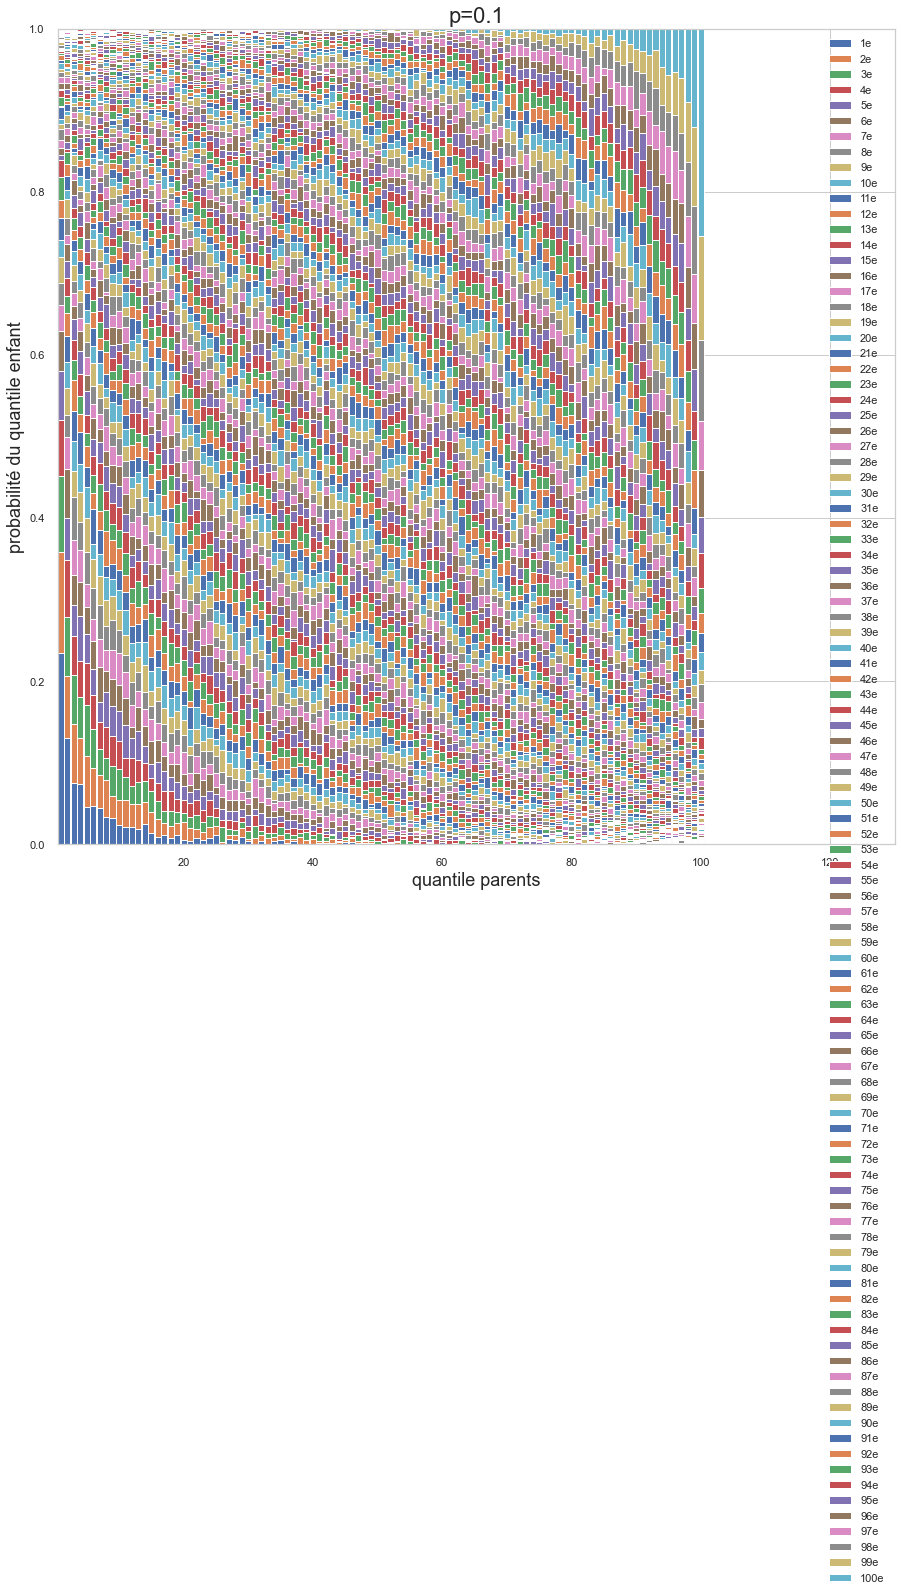

In [405]:
plot_conditional_distributions(0.1, cd, nb_quantiles)

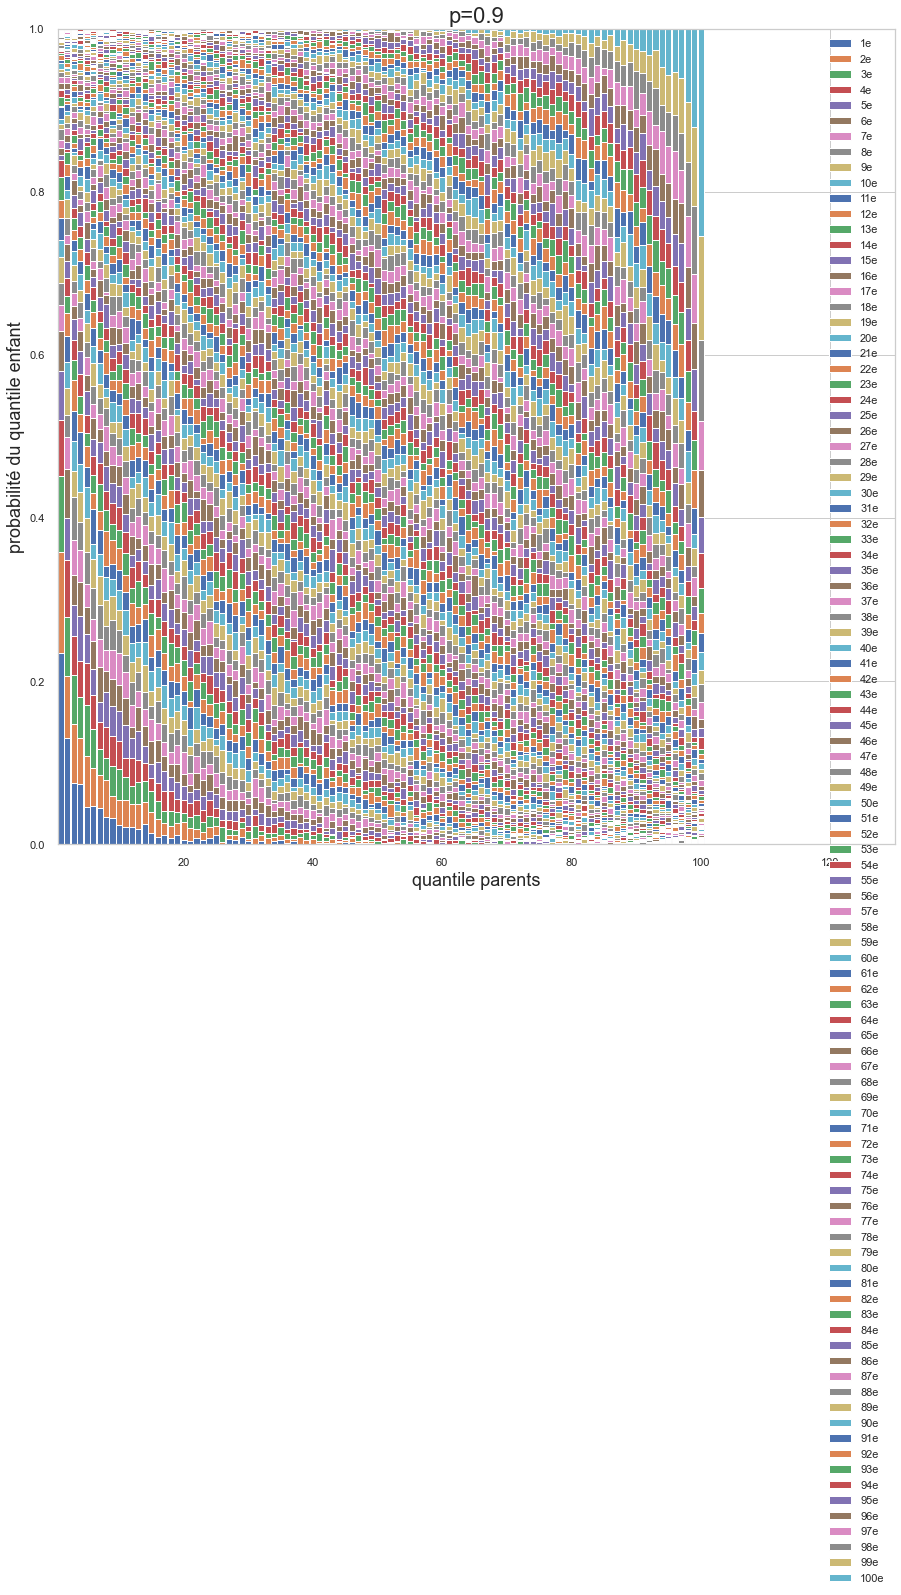

In [406]:
plot_conditional_distributions(0.9, cd, nb_quantiles)

<h3> Etape 8 : Créer 499 clone pour chaque individu de la WID

In [407]:
nouvel_echantillon_499=pd.concat([data_final]*499, ignore_index=True)
nouvel_echantillon_499

,country,country_name,c_i_child,y_child,pj,Gj
0,ALB,Albania,1,728.89795,0.815874,0.321410
1,ALB,Albania,2,916.66235,0.815874,0.321410
2,ALB,Albania,3,1010.91600,0.815874,0.321410
3,ALB,Albania,4,1086.90780,0.815874,0.321410
4,ALB,Albania,5,1132.69970,0.815874,0.321410
...,...,...,...,...,...,...
5788395,COD,"Congo, Dem. Rep.",96,810.62330,0.707703,0.459403
5788396,COD,"Congo, Dem. Rep.",97,911.78340,0.707703,0.459403
5788397,COD,"Congo, Dem. Rep.",98,1057.80740,0.707703,0.459403
5788398,COD,"Congo, Dem. Rep.",99,1286.60290,0.707703,0.459403


In [408]:
data_final=data_final.append(nouvel_echantillon_499)

In [409]:
data_final

,country,country_name,c_i_child,y_child,pj,Gj
0,ALB,Albania,1,728.89795,0.815874,0.321410
1,ALB,Albania,2,916.66235,0.815874,0.321410
2,ALB,Albania,3,1010.91600,0.815874,0.321410
3,ALB,Albania,4,1086.90780,0.815874,0.321410
4,ALB,Albania,5,1132.69970,0.815874,0.321410
...,...,...,...,...,...,...
5788395,COD,"Congo, Dem. Rep.",96,810.62330,0.707703,0.459403
5788396,COD,"Congo, Dem. Rep.",97,911.78340,0.707703,0.459403
5788397,COD,"Congo, Dem. Rep.",98,1057.80740,0.707703,0.459403
5788398,COD,"Congo, Dem. Rep.",99,1286.60290,0.707703,0.459403


In [410]:
data_final=data_final.sort_values(by=['country','c_i_child']).reset_index(drop=True)

In [411]:
data_final

,country,country_name,c_i_child,y_child,pj,Gj
0,ALB,Albania,1,728.89795,0.815874,0.321410
1,ALB,Albania,1,728.89795,0.815874,0.321410
2,ALB,Albania,1,728.89795,0.815874,0.321410
3,ALB,Albania,1,728.89795,0.815874,0.321410
4,ALB,Albania,1,728.89795,0.815874,0.321410
...,...,...,...,...,...,...
5799995,ZAF,South Africa,100,82408.55000,0.677000,0.682949
5799996,ZAF,South Africa,100,82408.55000,0.677000,0.682949
5799997,ZAF,South Africa,100,82408.55000,0.677000,0.682949
5799998,ZAF,South Africa,100,82408.55000,0.677000,0.682949


**Création de la colonnes ln_y_child**

In [412]:
data_final['ln_y_child']=data_final['y_child'].map(lambda x : np.log(x))

In [413]:
data_final

,country,country_name,c_i_child,y_child,pj,Gj,ln_y_child
0,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534
1,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534
2,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534
3,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534
4,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534
...,...,...,...,...,...,...,...
5799995,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444
5799996,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444
5799997,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444
5799998,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444


<h3> Etape 9 : Attribuer aux 500 individus leurs classes

**Création d'une loupe permetant de calculer le y_parent et le cd**

In [414]:
def loop(n,nb_quantiles,pj_pays):
    y_child,y_parents=generate_incomes(n,pj_pays)
    sample=compute_quantiles(y_child,y_parents,nb_quantiles)
    cd=conditional_distributions(sample,nb_quantiles)
    return cd

In [415]:
nb_quantiles=100
n=1000*nb_quantiles
element=np.arange(100)+1
quantiles_p=[]
quantiles_total=[]

In [416]:
element

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

**Stockage des noms des pays**

In [417]:
pays_list=data_final['country'].unique()

**Création de la colonne quantile parent a partir de la boucle et du pj de chaque pays**

In [418]:
for pays in pays_list:
    pj=data_final.loc[data_final['country']==pays,'pj'].iloc[0]
    proba=loop(n,nb_quantiles,pj)
    
    for i in range(100):
        proba_i=proba[i]
        quantiles_p=np.random.choice(element, 500, p = proba_i)
        quantiles_total.append(quantiles_p)
quantiles_parents_final=[j for quantile in quantiles_total for j in quantile]
data_final=pd.concat([data_final,pd.Series(quantiles_parents_final)],axis=1)

In [419]:
data_final=data_final.rename(columns={0:'c_i_parent'})

In [420]:
data_final

,country,country_name,c_i_child,y_child,pj,Gj,ln_y_child,c_i_parent
0,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534,10
1,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534,2
2,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534,3
3,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534,1
4,ALB,Albania,1,728.89795,0.815874,0.321410,6.591534,12
...,...,...,...,...,...,...,...,...
5799995,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444,20
5799996,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444,99
5799997,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444,100
5799998,ZAF,South Africa,100,82408.55000,0.677000,0.682949,11.319444,100


<h3> Etape 10 : Effacer la variable c_i_child 

In [421]:
data_final.drop(columns='c_i_child', inplace=True)

In [422]:
data_final

,country,country_name,y_child,pj,Gj,ln_y_child,c_i_parent
0,ALB,Albania,728.89795,0.815874,0.321410,6.591534,10
1,ALB,Albania,728.89795,0.815874,0.321410,6.591534,2
2,ALB,Albania,728.89795,0.815874,0.321410,6.591534,3
3,ALB,Albania,728.89795,0.815874,0.321410,6.591534,1
4,ALB,Albania,728.89795,0.815874,0.321410,6.591534,12
...,...,...,...,...,...,...,...
5799995,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,20
5799996,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,99
5799997,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100
5799998,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100


In [423]:
data_final.to_csv('D:/Lena/Desktop/OpenClassroom/Projet_7/Projet_7.csv',index=False)

<h2> <center> Mission 4

In [424]:
filepath = 'file:///D:/Lena/Desktop/OpenClassroom/Projet_7/Projet_7.csv'
data_final= pd.read_csv(filepath)
data_final

,country,country_name,y_child,pj,Gj,ln_y_child,c_i_parent
0,ALB,Albania,728.89795,0.815874,0.321410,6.591534,10
1,ALB,Albania,728.89795,0.815874,0.321410,6.591534,2
2,ALB,Albania,728.89795,0.815874,0.321410,6.591534,3
3,ALB,Albania,728.89795,0.815874,0.321410,6.591534,1
4,ALB,Albania,728.89795,0.815874,0.321410,6.591534,12
...,...,...,...,...,...,...,...
5799995,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,20
5799996,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,99
5799997,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100
5799998,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100


<h3> Création d'une dataframe contenant les revenu moyens des pays

In [425]:
y_child_moy=data_final.groupby(by='country_name').mean()
y_child_moy.reset_index(inplace=True)
y_child_moy=y_child_moy[['country_name','y_child']]
y_child_moy.rename(columns={'y_child':'mj'},inplace=True)

In [426]:
y_child_moy

,country_name,mj
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785
3,Austria,16637.600204
4,Azerbaijan,2357.429023
...,...,...
111,Uruguay,5290.784920
112,"Venezuela, RB",3167.147724
113,Vietnam,1377.773966
114,West Bank and Gaza,1114.098514


<h3> Fusion avec le data_final

In [427]:
data_final2= pd.merge(data_final, y_child_moy,on='country_name')
data_final2

,country,country_name,y_child,pj,Gj,ln_y_child,c_i_parent,mj
0,ALB,Albania,728.89795,0.815874,0.321410,6.591534,10,2994.829902
1,ALB,Albania,728.89795,0.815874,0.321410,6.591534,2,2994.829902
2,ALB,Albania,728.89795,0.815874,0.321410,6.591534,3,2994.829902
3,ALB,Albania,728.89795,0.815874,0.321410,6.591534,1,2994.829902
4,ALB,Albania,728.89795,0.815874,0.321410,6.591534,12,2994.829902
...,...,...,...,...,...,...,...,...
5799995,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,20,5617.904880
5799996,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,99,5617.904880
5799997,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100,5617.904880
5799998,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100,5617.904880


<h3> Création des colonnes logarithmes

In [428]:
data_final2['ln_mj']=np.log(data_final2['mj'])
data_final2

,country,country_name,y_child,pj,Gj,ln_y_child,c_i_parent,mj,ln_mj
0,ALB,Albania,728.89795,0.815874,0.321410,6.591534,10,2994.829902,8.004643
1,ALB,Albania,728.89795,0.815874,0.321410,6.591534,2,2994.829902,8.004643
2,ALB,Albania,728.89795,0.815874,0.321410,6.591534,3,2994.829902,8.004643
3,ALB,Albania,728.89795,0.815874,0.321410,6.591534,1,2994.829902,8.004643
4,ALB,Albania,728.89795,0.815874,0.321410,6.591534,12,2994.829902,8.004643
...,...,...,...,...,...,...,...,...,...
5799995,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,20,5617.904880,8.633714
5799996,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,99,5617.904880,8.633714
5799997,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100,5617.904880,8.633714
5799998,ZAF,South Africa,82408.55000,0.677000,0.682949,11.319444,100,5617.904880,8.633714


<h3> Représentation graphique des revenus en fonction du pays

In [429]:
data_pays=data_final2.loc[(data_final2["country_name"]=='France')|(data_final2["country_name"]=='United States')|(data_final2["country_name"]=='Iceland')|(data_final2["country_name"]=='Mexico')|(data_final2["country_name"]=='Brazil')|(data_final2["country_name"]=='Russian Federation')]

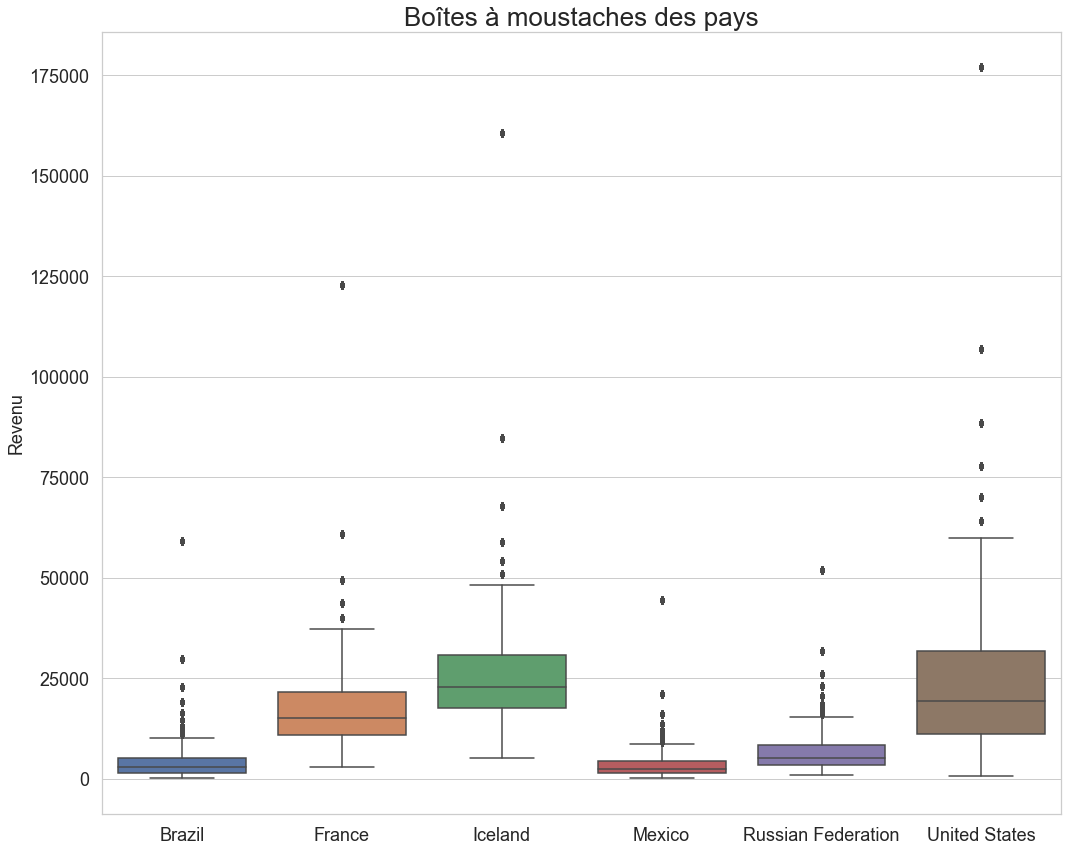

In [430]:
plt.figure(figsize=(15,12))

ax = sns.boxplot(x='country_name', y='y_child', data=data_pays)

plt.ylabel('Revenu', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('')
plt.xticks(fontsize=18)
plt.title('Boîtes à moustaches des pays', fontsize=26)

plt.tight_layout()
plt.show()

<h3> Vérification de la loi normale

**Test d'égalité des variance : homoscedasticité**

In [431]:
pg.homoscedasticity(data_final2.sample(frac=0.1))

,W,pval,equal_var
levene,1.232975,0.0,False


L'hypothèse H0 est rejeter, p-value est inférieur a 0.05 donc les variances ne sont pas équivalentes.

**Test normalité : shapiro**

In [432]:
pg.normality(data_final2, method='normaltest')

,W,pval,normal
y_child,5.641891e+06,0.0,False
pj,2.165474e+05,0.0,False
Gj,4.039333e+05,0.0,False
ln_y_child,1.771326e+05,0.0,False
c_i_parent,5.133181e+06,0.0,False
mj,1.297419e+06,0.0,False
ln_mj,9.755951e+05,0.0,False


Les variables ne suivent pas une distribution normale car la p-value est inférieur à 0.05 et donc l'hypohèse h0 est rejeter. 

Les conditions pour une anova paramétrique ne sont pas respecter pour cela on utilise le test kruskal wallis qui est un test non paramétrique. 

**Test kruskal wallis**

In [433]:
kruskal(data=data_final2, dv='y_child', between='country')

,Source,ddof1,H,p-unc
Kruskal,country,115,4.297171e+06,0.0


La p-value est inférieure à 0.05 donc on rejette H0 où tout les échantillons ont une distribution égale. Au moins un échantillon est différent d'un autre. 

<h3> Anova 

In [434]:
mod=smf.ols('y_child~country_name', data=data_final2.sample(frac=0.1)).fit()

In [435]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     4961.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:18:28   Log-Likelihood:            -5.9330e+06
No. Observations:              580000   AIC:                         1.187e+07
Df Residuals:                  579884   BIC:                         1.187e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 2989.8021     95.292     31.375      0.000    2803.033    3176.571
country_name[T.Argentina]                 2903.1603    134.365     21.606      0.000    2639.809    3166.512
country_name[T.Armenia]                  -1376.0457    133.982    -10.270      0.000   -1638.647   -1113.444
country_name[T.Austria]                   1.365e+04    134.831    101.225      0.000    1.34e+04    1.39e+04
country_name[T.Azerbaijan]                -665.7889    133.659     -4.981      0.000    -927.755    -403.822
country_name[T.Bangladesh]               -1982.7104    134.513    -14.740      0.000   -2246.351   -1719.070
country_name[T.Belarus]                    916.2049    133.982      6.838      0.000     653.604    1178.806
country_name[T.Belgium]                   1.211e+04    134.906     89.793      0.000    1.18e+04    1.24e+04
country_name[T.Bhutan]                   -1470.8295    135.058    -10.890      0.000   -1735.538   -1206.120
country_name[T.Bolivia]                    115.8425    134.252      0.863      0.388    -147.288     378.973
country_name[T.Bosnia and Herzegovina]    3240.0311    134.708     24.052      0.000    2976.007    3504.055
country_name[T.Brazil]                    1790.8182    133.885     13.376      0.000    1528.408    2053.228
country_name[T.Bulgaria]                  1939.3047    133.454     14.532      0.000    1677.739    2200.871
country_name[T.Burkina Faso]             -2083.5820    134.811    -15.456      0.000   -2347.806   -1819.358
country_name[T.Cambodia]                 -1510.7053    134.087    -11.267      0.000   -1773.512   -1247.898
country_name[T.Cameroon]                 -1199.1987    133.937     -8.953      0.000   -1461.711    -936.687
country_name[T.Canada]                    2.095e+04    133.872    156.528      0.000    2.07e+04    2.12e+04
country_name[T.Central African Republic] -2174.9808    134.647    -16.153      0.000   -2438.886   -1911.076
country_name[T.Chile]                     3825.0188    134.100     28.524      0.000    3562.186    4087.851
country_name[T.China]                     -458.2030    134.439     -3.408      0.001    -721.699    -194.707
country_name[T.Colombia]                   574.9641    134.906      4.262      0.000     310.552     839.376
country_name[T.Congo, Dem. Rep.]         -2711.7053    134.180    -20.210      0.000   -2974.693   -2448.718
country_name[T.Costa Rica]                2484.3936    135.051     18.396      0.000    2219.698    2749.089
country_name[T.Cote d'Ivoire]            -2588.4127    134.553    -19.237      0.000   -2852.132   -2324.693
country_name[T.Croatia]                   4653.3925    133.607     34.829      0.000    4391.527    4915.258
country_name[T.Cyprus]         

R2 = 0.499
R2ajusté = 0.499
La variable pays explique près de 50% de la variance du revenu
Les autres facteurs non considérés dans le modèle expliquent l'autre moitié de la variance du revenu

In [436]:
aov_table=sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
country_name,2.563741e+13,115.0,4960.763067,0.0
Residual,2.605967e+13,579884.0,NaN,NaN


In [437]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

                    sum_sq        df            F  PR(>F)     EtaSq
country_name  2.563741e+13     115.0  4960.763067     0.0  0.495916
Residual      2.605967e+13  579884.0          NaN     NaN       NaN


La p-valeur du Test de Fischer est: ~0.0

p-valeur <<< 0.05

On rejette donc l'hypothèse H0 et on conclut que le pays a une influence sur le revenu

**Test sur les résidus**

Les résidus sont la différence entre la valeur observé et la valeur prédite du model de régression. 

*Test de normalité*

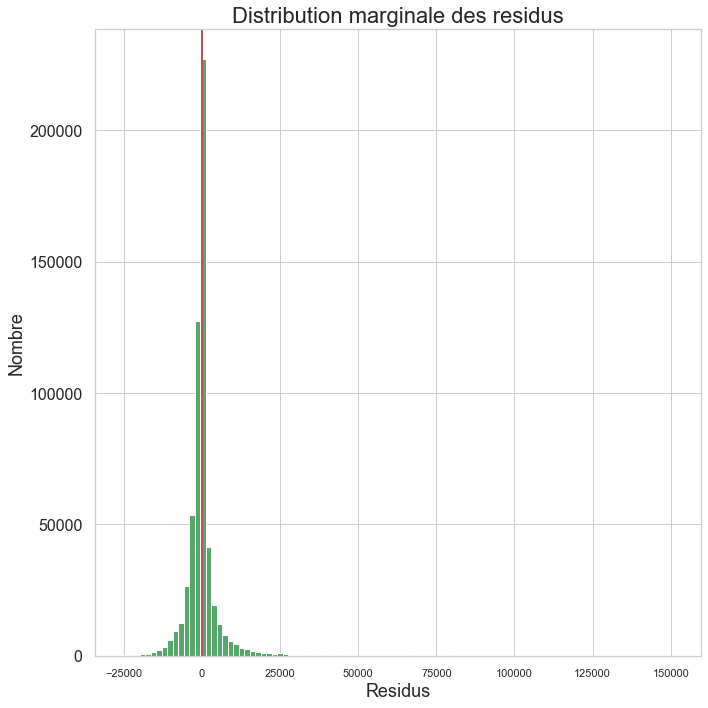

In [438]:
X = mod.resid
Xbar = np.mean(X)
Xsprime = np.std(X)
plt.figure(figsize=(10,10))
plt.hist(X, 100, facecolor='g')
plt.axvline(Xbar, color='r', linewidth=2)
plt.title(f'Distribution marginale des residus', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Residus',fontsize=18)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

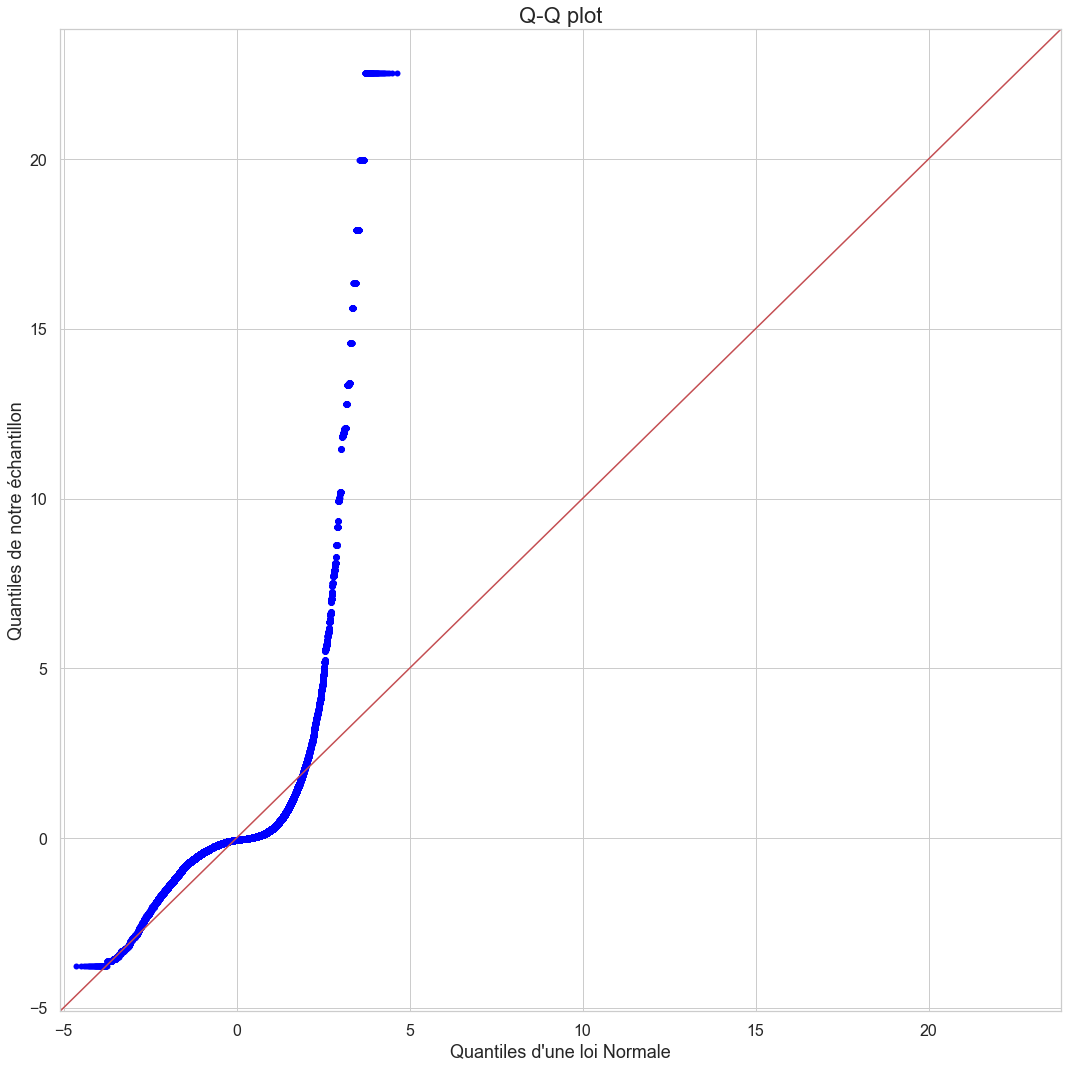

In [439]:
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(X, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot', fontsize=22)
plt.tight_layout()
plt.show()

In [440]:
st.kstest(X, 'norm')

KstestResult(statistic=0.6563367030033682, pvalue=0.0)

Hypothèse H0 : les résidus suivent une distribution gaussienne  

La p-value est inférieure au seuil de 5%. L'hypothèse H0 est ainsi rejetté. La distribution des résidus n'est donc pas gaussienne.

In [441]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mod.resid)
lzip(name, test)

[('Jarque-Bera', 222755972.43582106),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 6.828797251084461),
 ('Kurtosis', 98.03135602000017)]

Le test jarque-bera montre s'il y a une distribution normal, le p_value du test chi2 est inf à 0.05 donc les résidus ne suivent pas une distribution normal. 

*Test de linéarité*

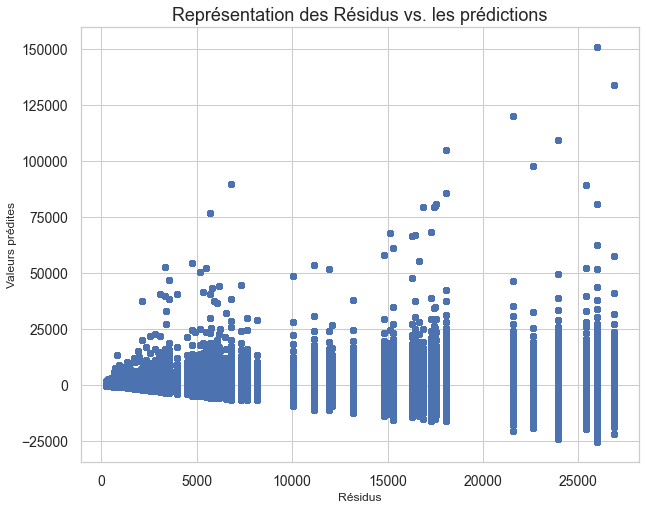

In [442]:
pred_val = mod.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, X, alpha = 0.5)
plt.title('Représentation des Résidus vs. les prédictions', fontsize=18)
plt.ylabel('Valeurs prédites')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Résidus')
plt.show()

On observe des valeurs atypiques

*Test d'homoscedasticité*

In [443]:
sms.het_goldfeldquandt(mod.resid, mod.model.exog)

(0.992117447500971, 0.983431553364536, 'increasing')

Ce test examine si la variance est égale entre les deux échantillons.

L'hypothèse h0 est que la variance sont égales. 

'increasing' lorsque la variance du deuxième echantillons est plus élever, il existe 'decreasing' et 'two-sided' également. 

on 

**Test de correlation des residues**

In [444]:
sms.durbin_watson(X)

2.0049947657639753

The null hypothesis of the test is that there is no serial correlation in the residuals.

Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

<h2> <center> Régression linéaire du revenu enfant sur le revenu moyen du pays et l'indice de Gini

In [445]:
# Regression linéaire 1

X = data_final2[['mj','Gj']]
Y = data_final2['y_child']
X = sm.add_constant(X)

In [446]:
results=sm.OLS(Y,X).fit()
results.params

const    1.191779e-09
mj       1.000000e+00
Gj       2.237357e-10
dtype: float64

In [447]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.192e-09     14.699   8.11e-11      1.0

In [448]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)
# mean squared error :
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model = round(results.rsquared,2)

Mean squared error: 44625749.13
Variance score: 0.50


La variance explicative est de 50%, il y a une significativité uniquement pour la variables mj et il y a une multicolinéarité entre les variables

**Test des résidues**

*Test de normalité*

In [449]:
res_reg_1=results.resid

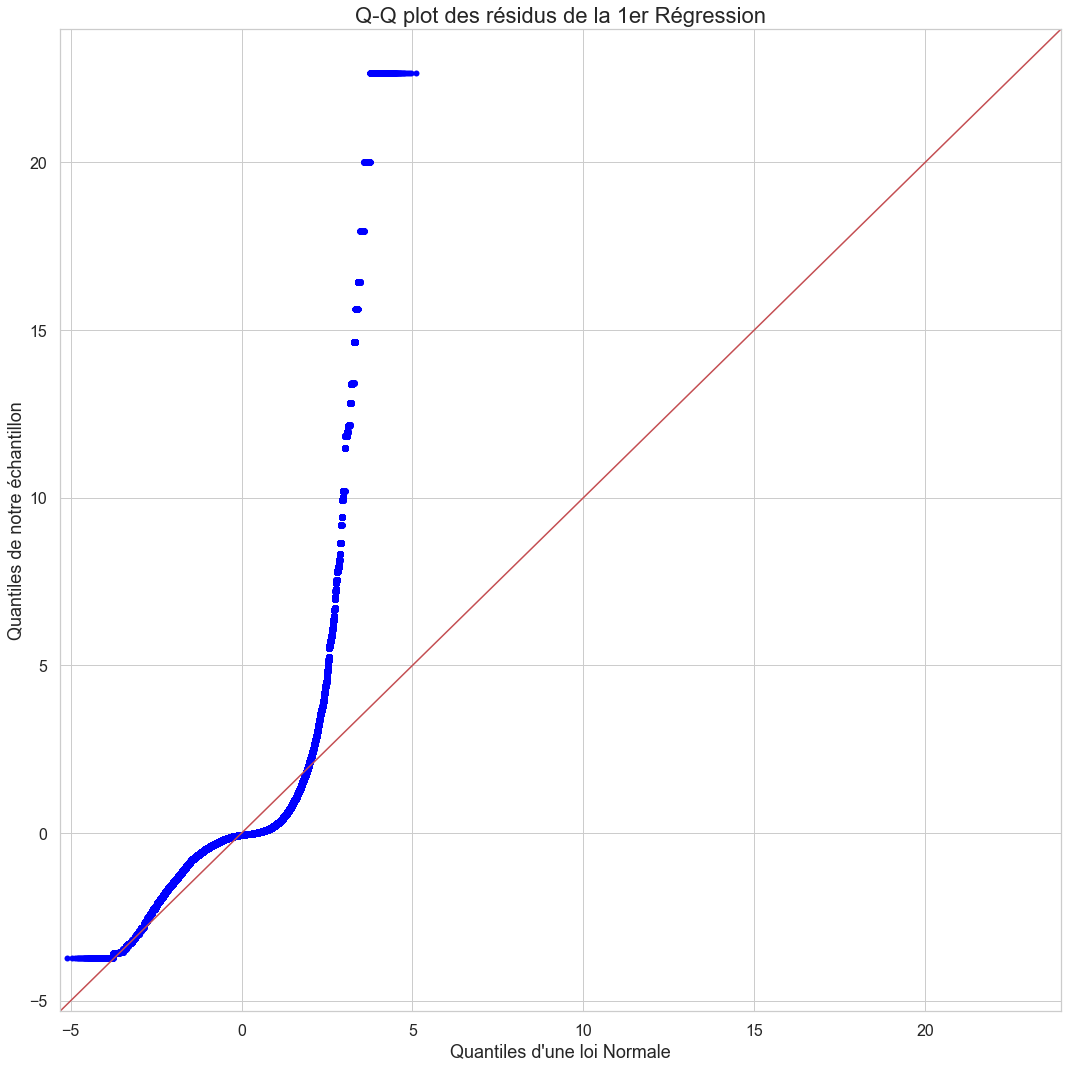

In [450]:
fig, ax = plt.subplots(figsize=(15,15))

sm.qqplot(res_reg_1, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot des résidus de la 1er Régression', fontsize=22)
plt.tight_layout()
plt.show()

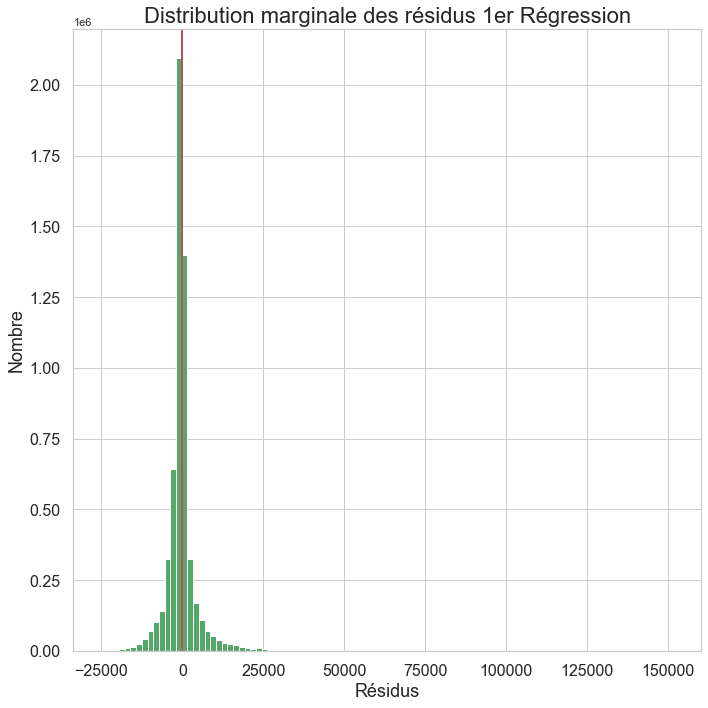

In [451]:
X_ln2=res_reg_1
Xbar_ln2=np.mean(X_ln2)
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus 1er Régression', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

In [452]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_reg_1)
lzip(name, test)

[('Jarque-Bera', 2103715018.0341783),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 6.739338670163546),
 ('Kurtosis', 95.32200668305708)]

Les résidus ne suivent pas une loi normale.

*Test de linéarité*

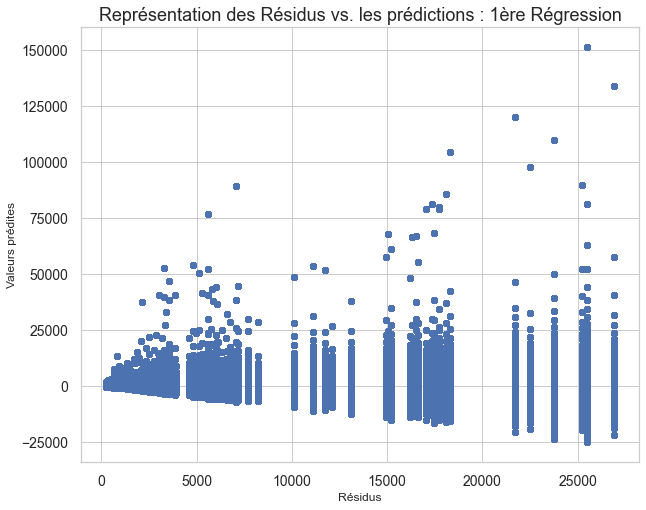

In [453]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, res_reg_1, alpha = 0.5)
plt.title('Représentation des Résidus vs. les prédictions : 1ère Régression', fontsize=18)
plt.ylabel('Valeurs prédites')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Résidus')
plt.show()

*Test multicolinéarité avec VIF*

C'est quand une variable indépendante peut etre prédite a partir d'une autre variable indépendante dans le model de régréssion.

In [454]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [455]:
calc_vif(X)

,variables,VIF
0,const,28.080272
1,mj,1.144592
2,Gj,1.144592


VIF = 1, pas de correlation entre les variables

VIF > 5 ou 10 multicolinéarité élevé

Il y a colinéarité avec la constante

 *Test Homoscédasticité*

In [456]:
sms.het_goldfeldquandt(res_reg_1, results.model.exog)

(0.7083843662913004, 0.9999999999999999, 'increasing')

Il y a d'homoscédasticité des résidues

<h2> Régréssion linéaire du ln du revenu enfant sur le ln du revenu moyen du pays et l'indice de Gini

In [457]:
# Regression linéaire 2

X = data_final2[['ln_mj','Gj']]
Y = data_final2['ln_y_child']
X = sm.add_constant(X)

In [458]:
results=sm.OLS(Y,X).fit()
results.params

const    0.496149
ln_mj    0.986367
Gj      -1.652268
dtype: float64

In [459]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 7.793e+06
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:19:11   Log-Likelihood:            -6.3181e+06
No. Observations:             5800000   AIC:                         1.264e+07
Df Residuals:                 5799997   BIC:                         1.264e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4961      0.003    170.994      0.0

In [460]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)
# mean squared error :
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model = round(results.rsquared,2)

Mean squared error: 0.52
Variance score: 0.73


La variance explicative est de 73%, il y a une significativité pour la variables mj, constante et Gj et il y a une plus multicolinéarité entre les variables

**Test résidues**

*Test de normalité*

In [461]:
res_reg_2=results.resid

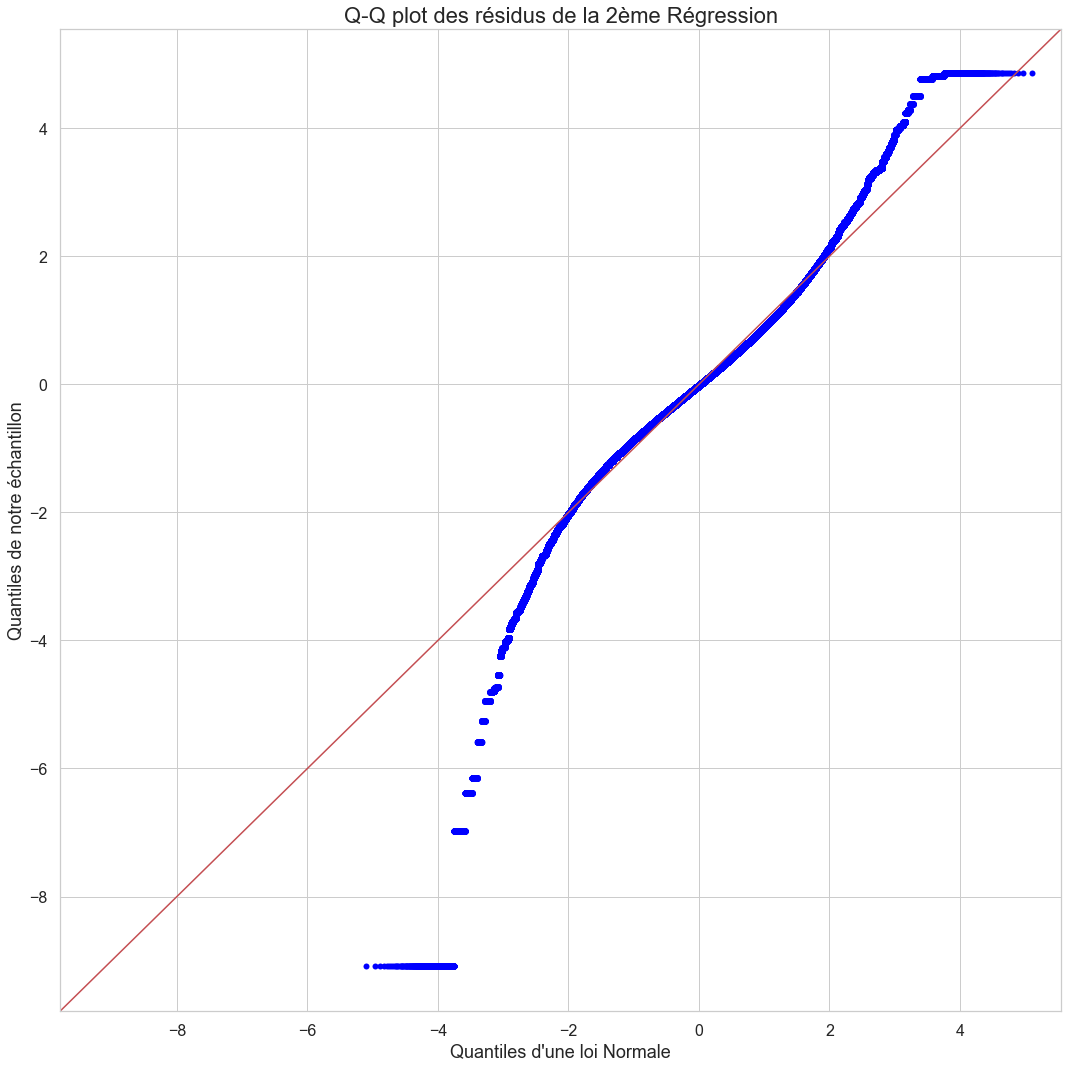

In [462]:
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(res_reg_2, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot des résidus de la 2ème Régression', fontsize=22)
plt.tight_layout()
plt.show()

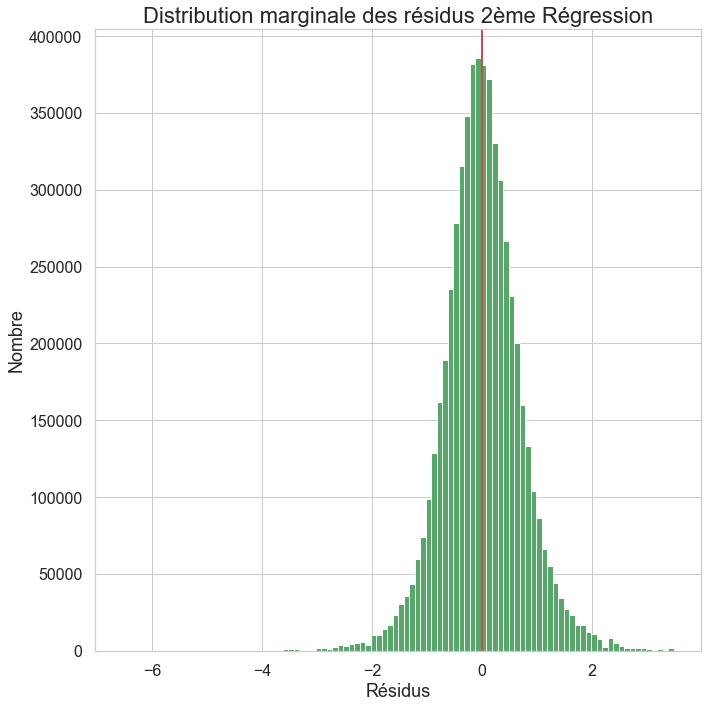

In [463]:
X_ln2=res_reg_2
Xbar_ln2=np.mean(X_ln2)
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus 2ème Régression', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

In [464]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_reg_2)
lzip(name, test)

[('Jarque-Bera', 1752378.6400795556),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.08087563121797588),
 ('Kurtosis', 5.687946890853735)]

Il ne suis pas de distribution normale

*Test de linéartié*

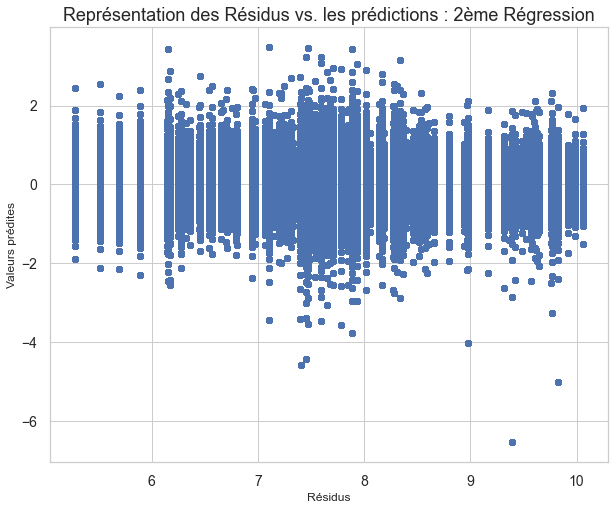

In [465]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, res_reg_2, alpha = 0.5)
plt.title('Représentation des Résidus vs. les prédictions : 2ème Régression', fontsize=18)
plt.ylabel('Valeurs prédites')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Résidus')
plt.show()

*Test de multicolinéarité avec VIF*

In [466]:
calc_vif(X)

,variables,VIF
0,const,94.402734
1,ln_mj,1.076905
2,Gj,1.076905


Il y a de la colinéarité pour la variable constante

*Test homoscédasticité*

In [467]:
sms.het_goldfeldquandt(res_reg_2, results.model.exog)

(1.0073677821625568, 2.0465960819902224e-10, 'increasing')

p-value inférieur à 0.05 donc il y a hommoscédasticité

<h2> Régréssion linéaire du revenu enfant sur le revenu moyen du pays, l'indice de Gini et la classe parents

In [468]:
# Regression linéaire 3

X = data_final2[['mj','Gj','c_i_parent']]
Y = data_final2['y_child']
X = sm.add_constant(X)

In [469]:
results=sm.OLS(Y,X).fit()
results.params

const        -2612.141345
mj               1.000118
Gj              14.170865
c_i_parent      51.615532
dtype: float64

In [470]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 2.107e+06
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:19:38   Log-Likelihood:            -5.9162e+07
No. Observations:             5800000   AIC:                         1.183e+08
Df Residuals:                 5799996   BIC:                         1.183e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2612.1413     15.092   -173.080      0.0

In [471]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)
# mean squared error :
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model = round(results.rsquared,2)

Mean squared error: 42405427.13
Variance score: 0.52


La variance explicative est de 52%, il y a une significativité pour la variables mj, la constante et c_i_parent et il y a une multicolinéarité entre les variables

**Test résidues**

*Test de normalité*

In [472]:
res_reg_3=results.resid

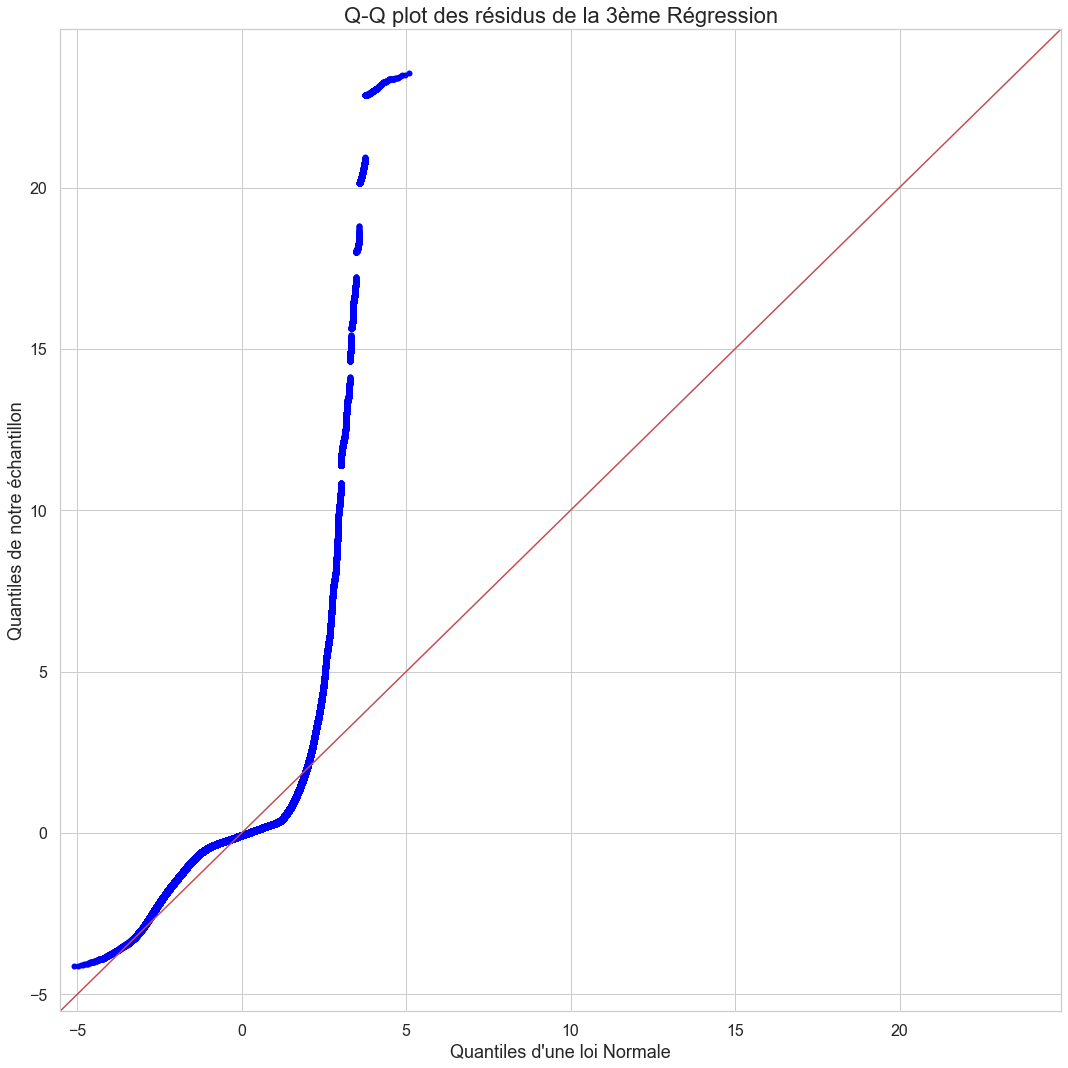

In [473]:
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(res_reg_3, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot des résidus de la 3ème Régression', fontsize=22)
plt.tight_layout()
plt.show()

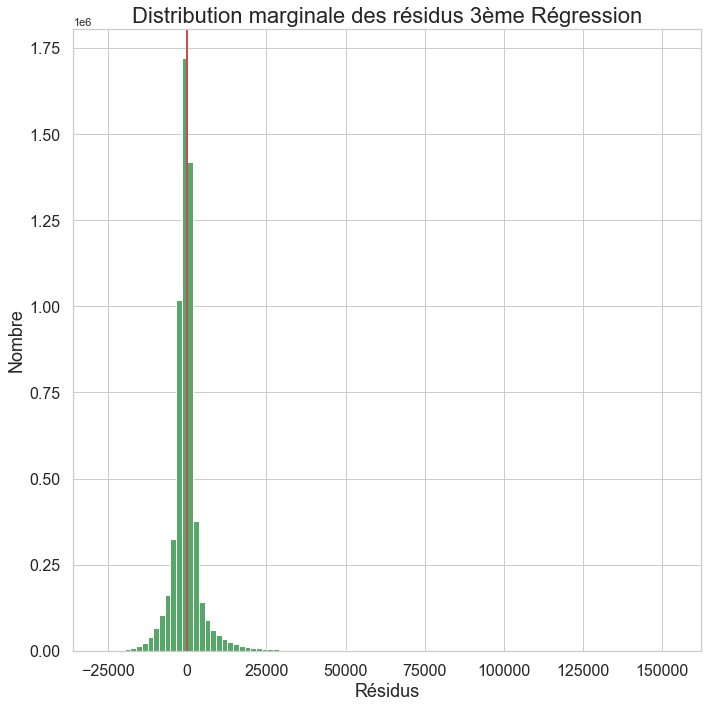

In [474]:
X_ln2=res_reg_3
Xbar_ln2=np.mean(X_ln2)
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus 3ème Régression', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

In [475]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_reg_3)
lzip(name, test)

[('Jarque-Bera', 2321227782.8974314),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 6.898059543355567),
 ('Kurtosis', 100.02962217333516)]

Il n'y a pas de normalité des résidus.

*Test de linéarité*

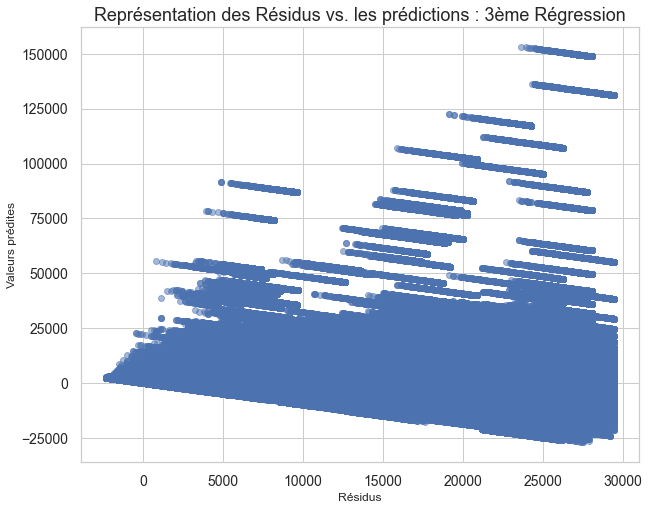

In [476]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, res_reg_3, alpha = 0.5)
plt.title('Représentation des Résidus vs. les prédictions : 3ème Régression', fontsize=18)
plt.ylabel('Valeurs prédites')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Résidus')
plt.show()

*Test multicolinéarité avec VIF*

In [477]:
calc_vif(X)

,variables,VIF
0,const,31.153377
1,mj,1.144592
2,Gj,1.144592
3,c_i_parent,1.000001


Il y a colinéarité pour la constante

*Test d'homoscédastisité*

In [478]:
sms.het_goldfeldquandt(res_reg_3, results.model.exog)

(0.7049073286783226, 0.9999999999999999, 'increasing')

Il y a une homoscédasticité 

<h3> Régréssion linéaire du ln du revenu enfant sur le ln du revenu moyen du pays, l'indice de Gini et la classe parents

In [479]:
# Regression linéaire 4

X = data_final2[['ln_mj','Gj','c_i_parent']]
Y = data_final2['ln_y_child']
X = sm.add_constant(X)

In [480]:
results=sm.OLS(Y,X).fit()
results.params

const        -0.056989
ln_mj         0.986481
Gj           -1.649545
c_i_parent    0.010917
dtype: float64

In [481]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 6.890e+06
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:20:10   Log-Likelihood:            -5.6998e+06
No. Observations:             5800000   AIC:                         1.140e+07
Df Residuals:                 5799996   BIC:                         1.140e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0570      0.003    -21.502      0.0

In [482]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)
# mean squared error :
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model = round(results.rsquared,2)

Mean squared error: 0.42
Variance score: 0.78


La variance explicative est de 78%, il y a une significativité pour toutes les variables et il y a plus de multicolinéarité entre les variables

**Test des résidues**

*Test de normalité*

In [483]:
res_reg_4=results.resid

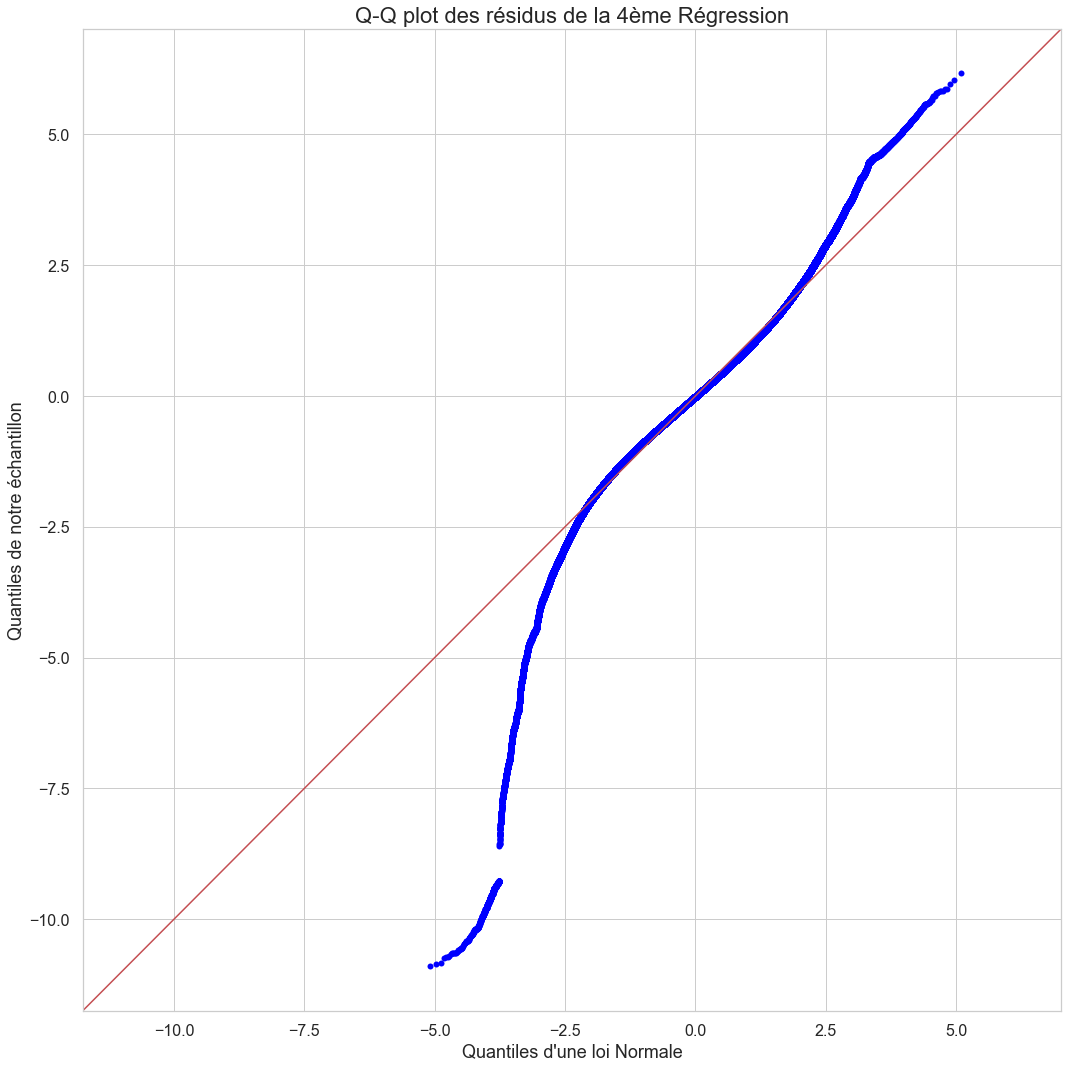

In [484]:
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(res_reg_4, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot des résidus de la 4ème Régression', fontsize=22)
plt.tight_layout()
plt.show()

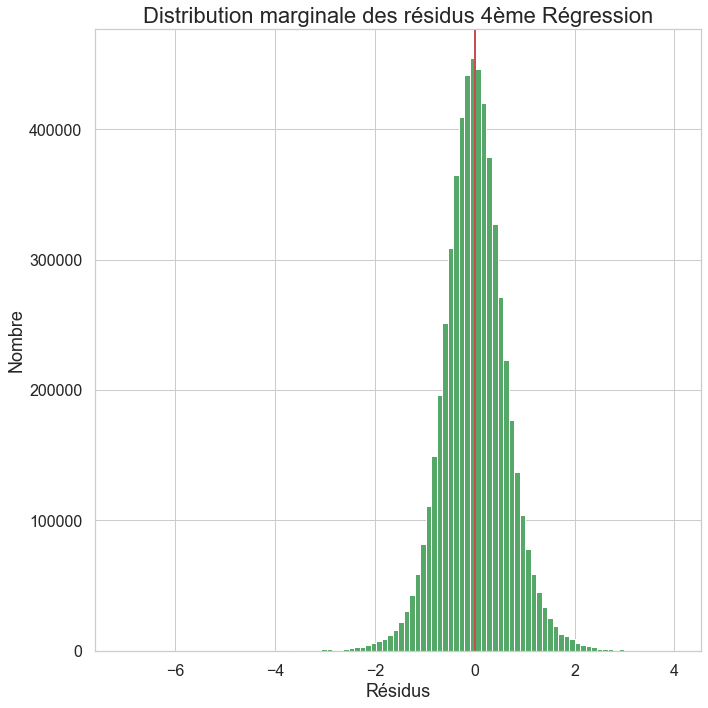

In [485]:
X_ln2=res_reg_4
Xbar_ln2=np.mean(X_ln2)
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus 4ème Régression', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

In [486]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(res_reg_4)
lzip(name, test)

[('Jarque-Bera', 1846607.4500268376),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -0.128610134208387),
 ('Kurtosis', 5.752266703916741)]

Il n'y a pas de distribution normale

*Test de linéarité*

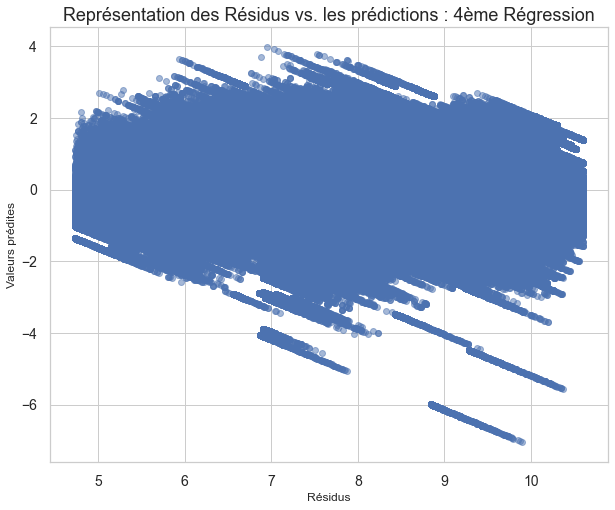

In [487]:
pred_val = results.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, res_reg_4, alpha = 0.5)
plt.title('Représentation des Résidus vs. les prédictions : 4ème Régression', fontsize=18)
plt.ylabel('Valeurs prédites')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Résidus')
plt.show()

*Test de multicolinéarité avec VIF*

In [488]:
calc_vif(X)

,variables,VIF
0,const,97.483194
1,ln_mj,1.076905
2,Gj,1.076906
3,c_i_parent,1.000001


*Test d'homoscédasticité*

In [489]:
sms.het_goldfeldquandt(res_reg_4, results.model.exog)

(0.981246751654849, 0.9999999999999999, 'increasing')

**Visualisation des outliers potentiel avec les distance de cooks**

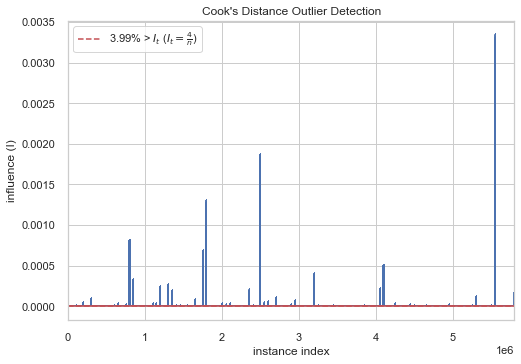

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [490]:
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(data_final2.drop(['country','country_name'],axis=1), res_reg_4)
visualizer.show()

Cook’s distance essentially measures the effect of deleting a given observation. Points with a large Cook’s distance need to be closely examined for being potential outliers.

**Visualisation des résidus par boxplot**

Text(0, 0.5, 'Résidus')

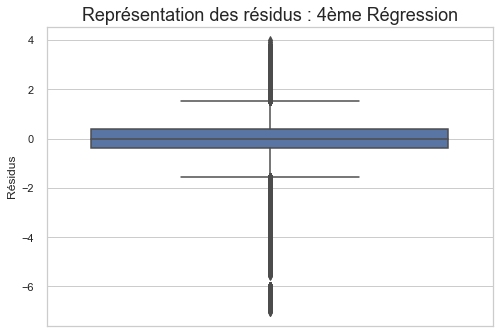

In [491]:
sns.boxplot( y=res_reg_4)
plt.title('Représentation des résidus : 4ème Régression', fontsize=18)
plt.ylabel('Résidus')

**Suppression des outliers avec le z-score**

In [492]:
from scipy import stats
z = np.abs(stats.zscore(res_reg_4))
print(z)

[1.2790725  1.14397919 1.16086585 ... 4.47702903 4.47702903 5.28758886]


In [493]:
threshold = 3
print(np.where(z > 3))

(array([  49513,   49604,   49789, ..., 5799997, 5799998, 5799999],
      dtype=int64),)


In [494]:
z_scores = stats.zscore(res_reg_4)

In [495]:
abs_z_scores = np.abs(z_scores)

In [496]:
filtered_entries = (abs_z_scores < 3)

In [497]:
new_res_reg_4 = res_reg_4[filtered_entries]

In [498]:
new_res_reg_4

0         -0.826894
1         -0.739559
2         -0.750476
3         -0.728642
4         -0.848727
             ...   
5798490    1.899589
5798492    1.888672
5798493    1.877756
5798496    1.910506
5798499    1.866839
Length: 5739707, dtype: float64

**Visualisation des résidus sans outliers par boxplot**

Text(0, 0.5, 'Résidus')

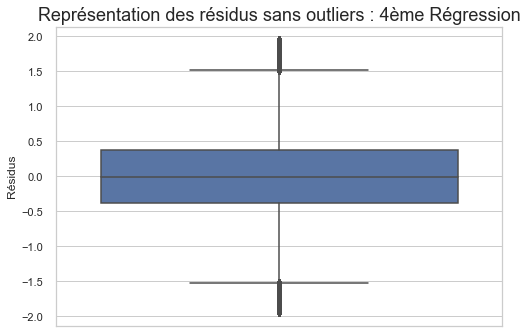

In [499]:
sns.boxplot( y=new_res_reg_4)
plt.title('Représentation des résidus sans outliers : 4ème Régression', fontsize=18)
plt.ylabel('Résidus')

*Test de normalité des résidus sans outliers*

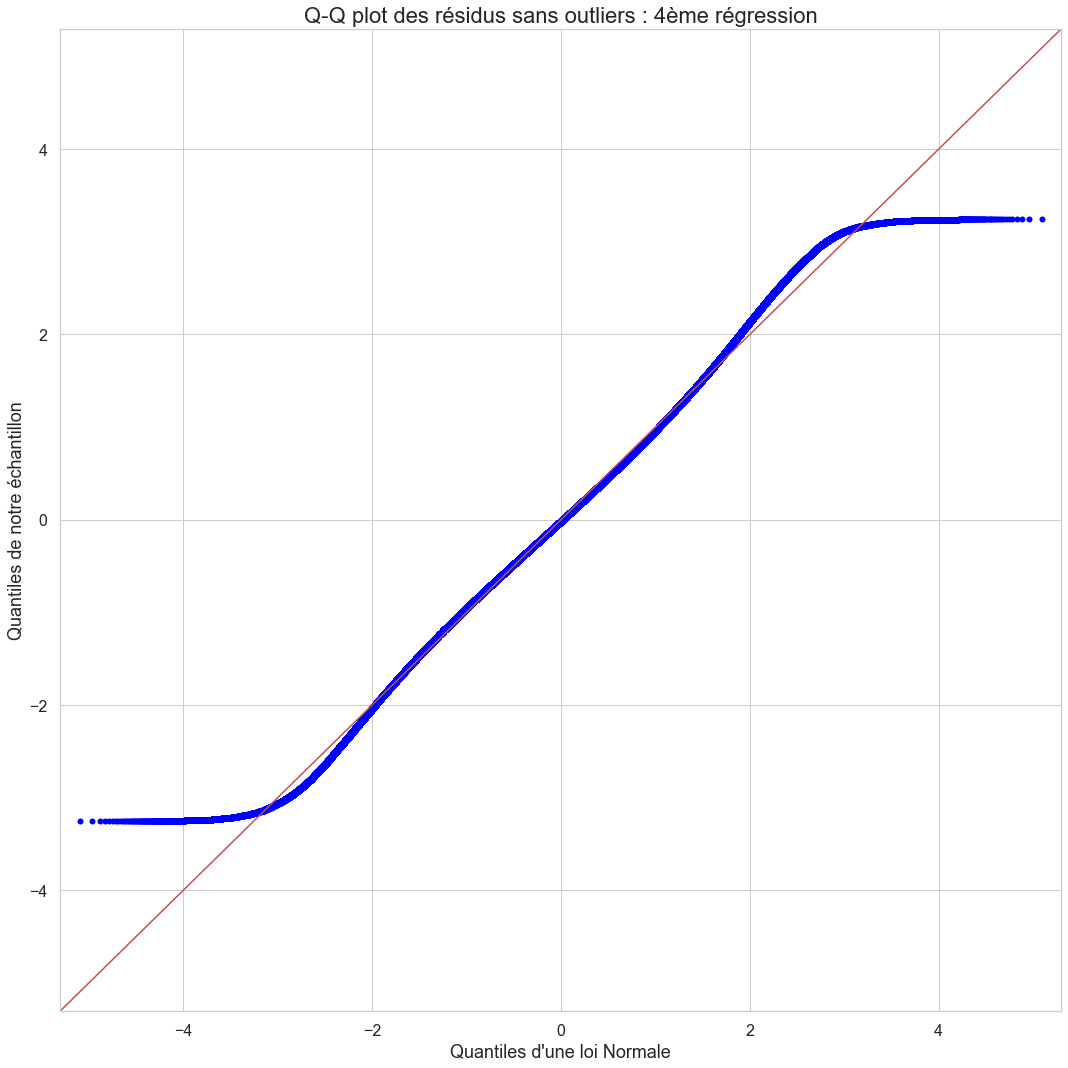

In [500]:
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(new_res_reg_4, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Q-Q plot des résidus sans outliers : 4ème régression', fontsize=22)
plt.tight_layout()
plt.show()

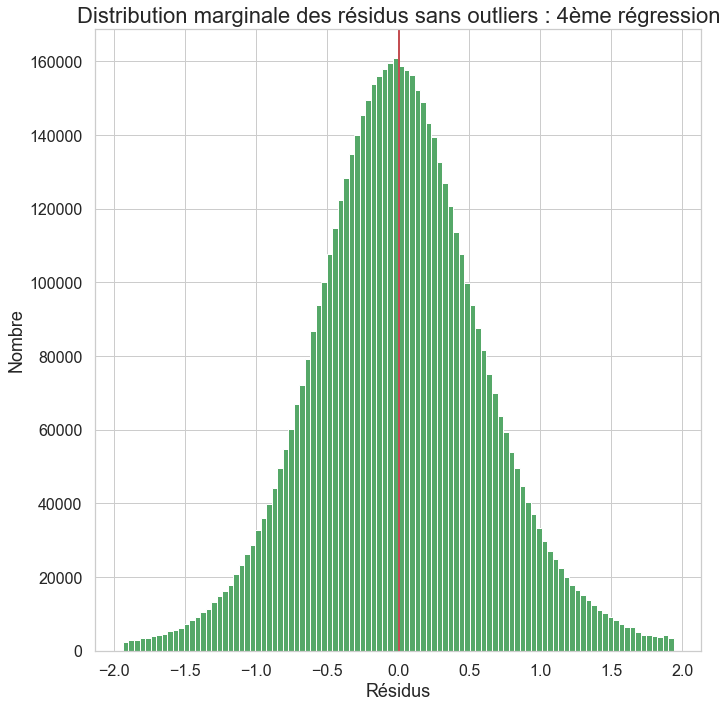

In [501]:
X_ln2=new_res_reg_4
Xbar_ln2=np.mean(X_ln2)
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus sans outliers : 4ème régression', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

In [502]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(new_res_reg_4)
lzip(name, test)

[('Jarque-Bera', 27212.945327943555),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.07289339308754057),
 ('Kurtosis', 3.3041946270567952)]